In [1]:
# import library
import numpy as np 
import pandas as pd 

# import visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from operator import attrgetter

# Import matplotlib.colors for colors gradation
from matplotlib.colors import LinearSegmentedColormap

# import statistic
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import kstest
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
from scipy.stats import iqr
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

# Adjust display options
def display_settings():
    pd.set_option('display.max_rows', None)         # Show all rows
    pd.set_option('display.max_columns', None)      # Show all columns
    pd.set_option('display.width', None)            # Adjust display width to fit the content
    pd.set_option('display.max_colwidth', None)     # Show full column content if it's truncated
# Reset all options to defaults
def display_setting_reset():
    pd.reset_option('all')

# **1. Introduction**


***AWS SaaS or Amazon Web Service Software-as-a-Service as a business and soft ware delivery model that enables organization to provide their offering to customers in a low-friction and service-centric manner. AWS work with organizations to build a SaaS model that establishes agility and operational efficiency as pillars of their business strategy-promoting growth, reach, and innovation.***

source: https://aws.amazon.com/saas/




In [2]:
# Importing DataFrame (df)
prep = pd.read_csv(r'C:\Users\pradh\Documents\Purwadhika\CAPSTONE MODULE 2\SaaS-Sales.csv')

# Display DataFrame by head 5 (default)
display(prep.head())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


This dataset contains transaction data from fictitious SaaS company selling sales and marketing software to other companies (B2B). in the dataset, each row represent a product in a transaction, and the columns include:

- `Row ID`        : A unique identifier for each transaction

- `Order ID`      : A unique identifier for each order

- `Order Date`    : The date when the order was placed

- `Date Key`      : A numerical representation of the order date (YYYYMMDD)

- `Contact Name`  : The name of the person who placed the order

- `Country`       : The country where the order was placed

- `City`          : The city where the order was placed

- `Region`        : The region where the order was placed

- `Subregion`     : The subregion where the order was placed

- `Customer`      : The name of the company that placed the order

- `Customer ID`   : A unique identifier for each customer

- `Industry`      : The industry the customer belongs to

- `Segment`       : The customer segment (SMB, Strategic, Enterprise, etc.)

- `Product`       : The product was ordered

- `License`       : The license key for the product

- `Sales`         : The total sales amount for the transaction

- `Quantity`      : The total number of items in the transaction

- `Discount`      : The discount applied to the transaction

- `Profit`        : The profit for the transaction

## **1.1. Business Problem**

From this gathered AWS SaaS Sales data in csv format about their transaction history from 2020 until 2023, the company want to analyze about:

1. How much revenue did AWS SaaS generate over year? and how much loss did it incur?

2. What are the factors contributing to the generated losses?

3. How are individual AWS SaaS product performing in terms of sales and profits?

4. What are the purchasing pattens of retained customers?

## **1.2. Goals**

The primary goals of this AWS SaaS analysis are:

1. Determine the overall revenue generated over the years 2020 to 2023, Analyze the trends to identify periods of growth and decline.

2. Identify and analyze the factors contributing to revenue losses to mitigate them in the future.

3. Assess the performance of individual AWS SaaS products in terms of sales and profits to identify top-performing and underperforming products.

4. Understand the purchasing patterns of retained custoers to improve customer retention strategies.

# **2. Data Preparation**

## **2.1. Data Understanding**

### 2.1.A. Data Type (Dtype) Convertion

Before data cleaning, we need to check if the data type of each column matches its supposed data type. here we do it by re importing the DataFrame and directly conver the data type to their correct formats using `dtype` and `parse_dates` method, encusing consistency and avoiding type-related error in subsequent analysis. here details about dtype format convertion:

with `dtype` :
- `'Customer ID'` ( `int` ) --> `'Customer ID'` ( `str` )

- `'Row ID'` ( `int` ) --> `'Row ID'` ( `str` )

with `parse_dates` :

- `'Order Date'` ( `str` ) --> `'Order Date'` ( `datetime` )

In [3]:
# Converting step of selected columns for desired dtype
# And save it into df so it will be replace from latest input
df_SaaS = pd.read_csv(

        # DataFrame (AWS SaaS Sales) File Source
            r'C:\Users\pradh\Documents\Purwadhika\CAPSTONE MODULE 2\SaaS-Sales.csv',

        dtype       = {                 # String (STR) Conversion
            'Customer ID'   : str,      # Int to Str
            'Row ID'        : str       # Int to Str
        },

        parse_dates = [                 # Date time Conversion
            'Order Date'               # Object to Date time
        ]
    )

# Display DataFrame and DataFrame info
print(f'''
      \n--- df_SaaS Dtype Convertion ---\n
      \rTotal Columns and rows from dataset: {df_SaaS.shape}
''')

df_SaaS.info()
display(df_SaaS.head(), 'Table 1.1. df_SaaS Dtype Convertion')


      
--- df_SaaS Dtype Convertion ---

Total Columns and rows from dataset: (9994, 19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   object        
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 1

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


'Table 1.1. df_SaaS Dtype Convertion'

1. Categorical Nominal

    `'Row ID'`, `'Order Date'`, `'Date Key'`, `'Contact Name'`, `'Country'`, `'City'`, `'Region'`, `'Subregion'`, `'Customer'`, `'Customer ID'`, `'Indusrty'`, `'Product'`, `'License'`, `'Segment'`

2. Categorical Ordinal

    `'Order Date'`, `'Data Key'`

3. Numeric Discrete

    `'Quantity'`

4. Numeric Continues

    `'Discount'`, `'Sales'`, `'Profit'`

### 2.1.B. add `Unit Price` and `Profit Category` Columns to dataset

Column `Unit price` added to the dataset to fully understanding about this dataframe by:

- `Unit Price` (Numeric Continues ) = `Sales` / (`Quantity` * (1 - `Discount`))

    - Used to find correlation of product price to another

- `Profit Category` (Categorical Nominal) = Devided loss (as Negative) and profit (as Positive) in `Profit` column

    - Used to create visualization of Negative and Positive Profit

- `Profit Category Numeric` (Binary) = Manualy convert Profit Category into 1 as Positive and 0 as Negative

    - Use for correlation of numerical type columns

In [4]:
# Add Price Column
df_SaaS['Unit Price'] = df_SaaS['Sales']/((df_SaaS['Quantity'])*(1-(df_SaaS['Discount'])))

# Add columns ('Negative', 'Positive') to compare discounts for loss and profits
df_SaaS['Profit Category'] = df_SaaS['Profit'].apply(lambda x: 'Negative' if x <= 0 else 'Positive')

# Add columns numeric for ('Profit Category') for correlation purpose
df_SaaS['Profit Category Numeric'] = df_SaaS['Profit Category'].apply(lambda x: 0 if x == 'Negative' else 1)

# Print updated DataFrame and DataFrame info
display(df_SaaS.head(), 'Table 1.2. Added Columns')

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Segment,Product,License,Sales,Quantity,Discount,Profit,Unit Price,Profit Category,Profit Category Numeric
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,130.98,Positive,1
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,243.98,Positive,1
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,7.31,Positive,1
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,348.21,Negative,0
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,...,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,13.98,Positive,1


'Table 1.2. Added Columns'

### 2.1.C. Selecting Necessary and Re-Arrange Columns

Selecting necessary columns and re-arranging columns used to make easier reading without removing important data for analysis

- Remove columns : Row ID, Date Key, License, Customer ID

- Re-Arrange columns : Order ID, Order Date

In [5]:
# Droping columns for better visualization
df_SaaS.drop(columns = ['Row ID', 'Date Key', 'License', 'Customer ID'], inplace = True)

# Re-arrange columns for better visualization
df_SaaS = df_SaaS[['Order ID','Order Date','Contact Name', 'Customer', 'Industry','Segment', 'Country', 'City','Region', 
                   'Subregion', 'Product', 'Unit Price', 'Quantity', 'Discount', 'Sales', 'Profit', 
                   'Profit Category', 'Profit Category Numeric']].reset_index(drop = True)

# Display DataFrame and DataFrame info
display(df_SaaS.head(), 'Table 1.3. Updated df_SaaS Columns')

,Order ID,Order Date,Contact Name,Customer,Industry,Segment,Country,City,Region,Subregion,Product,Unit Price,Quantity,Discount,Sales,Profit,Profit Category,Profit Category Numeric
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Chevron,Energy,SMB,Ireland,Dublin,EMEA,UKIR,Marketing Suite,130.98,2,0.00,261.9600,41.9136,Positive,1
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Chevron,Energy,SMB,Ireland,Dublin,EMEA,UKIR,FinanceHub,243.98,3,0.00,731.9400,219.5820,Positive,1
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,Phillips 66,Energy,Strategic,United States,New York City,AMER,NAMER,FinanceHub,7.31,2,0.00,14.6200,6.8714,Positive,1
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Royal Dutch Shell,Energy,SMB,Germany,Stuttgart,EMEA,EU-WEST,ContactMatcher,348.21,5,0.45,957.5775,-383.0310,Negative,0
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Royal Dutch Shell,Energy,SMB,Germany,Stuttgart,EMEA,EU-WEST,Marketing Suite - Gold,13.98,2,0.20,22.3680,2.5164,Positive,1


'Table 1.3. Updated df_SaaS Columns'

### a. Details by Unique, Nunique, and Describe

To understand and manage the diversity and uniqueness of data within a dataset, `.unique` and `.nunique` used. also to provide foundational insights during the initial stages of data analysis and help guide subsequent analytical decisions. about `.describe` provides a quick overview o the central tendecy, dispersion, and shape of a dataset's distribution, excluding `NaN` values which use `.isna().sum()`.

- `.Unique` : For identifying the distinct categories or classes in a dataset, aiding in tasks such as classification or segmentation. which is essential for understanding the dataset's structure

- `.Nunique` : helps understand the cardinality of a columns, which is important for choosing the right data modeling techniques.

- `.describe` : used for initial insights into the numerical characteristics of their data, helping to make informed decisions on further data processing and analysis steps.

In [6]:
# Display DataFrame describe and DataFrame info
display(df_SaaS.describe(), 'Table 1.4. df_SaaS Describe')

,Order Date,Unit Price,Quantity,Discount,Sales,Profit,Profit Category Numeric
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,75.571127,3.789574,0.156203,229.858001,28.656896,0.806284
min,2020-01-04 00:00:00,0.990000,1.000000,0.000000,0.444000,-6599.978000,0.000000
25%,2021-05-23 00:00:00,6.480000,2.000000,0.000000,17.280000,1.728750,1.000000
50%,2022-06-27 00:00:00,19.980000,3.000000,0.200000,54.490000,8.666500,1.000000
75%,2023-05-15 00:00:00,76.980000,5.000000,0.200000,209.940000,29.364000,1.000000
max,2023-12-31 00:00:00,7546.160000,14.000000,0.800000,22638.480000,8399.976000,1.000000
std,NaN,188.961461,2.225110,0.206452,623.245101,234.260108,0.395229


'Table 1.4. df_SaaS Describe'

This dataset reveals a diverse range of sales and protit metrics, with significant variations in prices, quantities.
- **Date Distribution**: The dataset covers orders from January 4,2020 to December 31,2023. This time range allows for comprehensive analysis of sales trends over nearly four years

- **Price Range** : Prices vary significantly, with an average of 75.57 ( `mean` ) and a standard deviation of 188.6 ( `std` ) . This indicates a wide range of product pricing

- **Quantity Sold** : On average, 3.79 units are ordered, with highest being 14 and lowest is 1. this suggest a mix of both bulk and smaller purchases

- **Sales Performance** : Average sales amount is 229.86, with a large standard deviation 623.25, indicating diverse sales amounts across orders

In [7]:
# Analyze unique and count unique values for each column
columns_unique = pd.DataFrame({
    'Chosen Columns': df_SaaS.columns,
    'Unique Count / Columns': [df_SaaS[col].nunique() for col in df_SaaS.columns],
    'Unique Value / Columns': [df_SaaS[col].unique() for col in df_SaaS.columns]
})

# Select specific columns to display their unique details
selected_rows = ['Contact Name', 'Country', 'City', 'Region', 'Subregion', 
                 'Customer', 'Industry', 'Segment', 'Product']

#
selected_columns_unique = columns_unique[columns_unique['Chosen Columns'].isin(selected_rows)]

#
selected_columns_unique.reset_index(inplace = True)

# Display the result
display(selected_columns_unique.drop(columns = 'index'), 'Table 1.5. Selected Columns Unique Values')

,Chosen Columns,Unique Count / Columns,Unique Value / Columns
0,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Morrison, Claire Welch, Carol Campbell, Blake Hughes, Melanie Sharp, Luke Bower, Jonathan Ferguson, Sam Parsons, Neil Gill, Amelia Campbell, Chloe Short, Jasmine Metcalfe, Karen Mathis, Dylan Dickens, Sophie Lewis, Gavin Mitchell, Katherine Dowd, Harry Brown, Brian Dickens, Joseph Newman, Nicola Howard, Stewart Wilson, Eric McLean, Leah Clarkson, Alison Davidson, Sophie Vance, Anne Lee, Maria Dyer, Julia Ellison, Gordon McLean, Jessica Buckland, Bernadette Nolan, Sonia Ince, William Lewis, Melanie Young, Edward Oliver, Peter Quinn, Max Marshall, Jan Watson, Carol Ball, Gavin Walsh, Penelope Peake, Amy Scott, Carl Jackson, Joe Wallace, Luke Mills, Alexandra Dyer, Rebecca Dickens, Audrey Hardacre, Jennifer Dowd, Natalie Sanderson, Samantha Rampling, Sally Berry, Anthony Clark, Victor Short, Austin Newman, Rose Scott, Tim Morrison, Harry Murray, Dylan Dowd, Angela Parsons, Lisa Oliver, Joseph Duncan, Paul MacDonald, Gordon Graham, Sean Bower, Anthony Sanderson, Stewart Marshall, Joanne Carr, Angela Davies, William Alsop, Owen Watson, Melanie Davidson, Warren Forsyth, Gabrielle Ogden, Justin Randall, Jack Graham, Sophie Henderson, Brian Short, Samantha Lawrence, Una Hudson, Kimberly North, Dylan Ogden, Jonathan Clark, Kevin Vaughan, Madeleine Smith, Diana Ince, Tracey Knox, Michelle McLean, Diana Bell, Jan Clark, Pippa Smith, Rebecca Wilson, Irene Smith, ...]"
1,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas, Engie, Microsoft, Pfizer, Toyota Motor, Home Depot, Wells Fargo, Carrefour, Costco Wholesale, McKesson, Siemens, Intel, Glencore, Procter & Gamble, Banco Santander, Pemex, Samsung Electronics, Sony, Morgan Stanley, Bank of America Corp., Tesco, Aviva, Mondelez International, Abbott Laboratories, Fannie Mae, Aetna, Oracle, Nissan Motor, Tyson Foods, Verizon Communications, Itochu, Daimler, Walgreens, Boeing, Valero Energy, Nestle, Philip Morris International, Trafigura Group, Walmart, Cisco Systems, Prudential Financial, Amazon, Gazprom, FedEx, Honda Motor, CVS Health, General Motors, State Farm Insurance Cos., Comcast, AmerisourceBergen, Johnson & Johnson, HonHai Precision Industry, American Express, J.P. Morgan Chase & Co., Kroger, Volkswagen, Merck, AT&T, Allstate, BMW, Humana, Sprint Nextel, Allianz, United Parcel Service, Target, Airbus, Cigna, Goldman Sachs Group, Lowes, Ford Motor, Apple, China National Petroleum, ConocoPhillips, Bosch, HSBC Holdings, Enel, Sysco, Marathon Petroleum, UnitedHealth Group, Mitsubishi, Exxon Mobil, Anthem, Petrobras, Lukoil, Coca-Cola, PepsiCo, General Electric, Berkshire Hathaway, Walt Disney, Alphabet, Huawei, News Corp., Caterpillar, Citigroup, Panasonic, Safeway]"
2,Industry,10,"[Energy, Finance, Tech, Healthcare, Manufacturing, Retail, Consumer Products, Misc, Transportation, Communications]"
3,Segment,3,"[SMB, Strategic, Enterprise]"
4,Country,48,"[Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France, Australia, Luxembourg, Brazil, Philippines, India, United Kingdom, Chile, Spain, South Africa, Portugal, Colombia, Belgium, Russia, Netherlands, Mexico, Poland, Singapore, New Zealand, Czech Republic, Saudi Arabia, Argentina, South Korea, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, China, Austria, Indonesia, Egypt, Denmark, Croatia, Taiwan, Qatar, Slovenia, Iceland]"
5,City,262,"[Dublin, New York City, Stuttgart, Stockholm, Toronto, Saitama, Naples, Ankara, Los Angeles, San José, Paris, Istanbul, Tokyo, Aichi, Wollongong, Hanover, Luxembourg, Salvador, Davao City, Kolkata, London, Brighton, Sydney, Puente Alto, Madrid, Rio de Janeiro, Cape Town, Lisboa, Uppsala, Bogotá, Brussels, Moscow, Canberra, The Hague, Mexico City, Manila, Geelong, Santiago, Aurora, Warsaw, Newark, Monterrey, Rome, Chicago, Singapore, Wellington, Osaka, Melbourne, Pr

'Table 1.5. Selected Columns Unique Values'

From this `unique` and `nunique` columns, it suggest a robust and diverse business with a wide geographical reach and varied industry. The product diversity and strong customer base furter strengthen its marketing position. This can help the business navigate challenges and seize opportunities in different markets and industries.

In [8]:
grouped_data = df_SaaS[['Industry', 'Contact Name', 'Customer', 'Segment', 'Country', 'City', 'Product']].groupby('Customer').agg(list)

# 'Customer' column unique for each 'Contact Name'
# Columns to make unique
col_unique = ['Contact Name', 'Segment', 'Country', 'City', 'Product', 'Industry']

# Apply the same logic to all specified columns
for col_check in col_unique:
    grouped_data[col_check] = grouped_data[col_check].apply(lambda x: list(set(x)))

# Chose 20 rows by df.iloc 5 step to become sample for further analyze and learn the data behaviour
# (Systematic Sample)
grouped_data = grouped_data.iloc[0:-1:5].reset_index()

# Display the result
display(grouped_data, 'Table 1.6. Grouped Data by Customer')

,Customer,Industry,Contact Name,Segment,Country,City,Product
0,AT&T,[Communications],"[Phil Dowd, Ian Sharp, William May, Jan Baker, Frank Hart, Connor Paige, Una Hudson, Blake Campbell, Stephen Dyer]","[Enterprise, Strategic, SMB]","[Australia, Argentina, United Kingdom, Japan, Poland, Czech Republic, Luxembourg, Russia, Brazil, Mexico, Finland, Ireland, Germany, Sweden, Canada, South Africa, Ukraine, France, Greece, United States, Colombia, Spain, South Korea]","[Busan, Mexico City, Chicago, Tokyo, Barcelona, Aichi, Prague, Valencia, Seattle, Athens, Rio de Janeiro, Moscow, Aurora, Dublin, Luxembourg, Indianapolis, San Francisco, Los Angeles, Rosario, Ottawa, Gothenburg, London, Kyiv, Cali, Sydney, Nizhny Novogorod, Henderson, Johannesburg, Liverpool, New York City, Paris, Hiroshima, Raleigh, Warsaw, Toronto, Helsinki, Leipzig, Berlin]","[Data Smasher, ChatBot Plugin, SaaS Connector Pack, Marketing Suite - Gold, FinanceHub, Site Analytics, Storage, Marketing Suite, Big Ol Database, ContactMatcher, Support, SaaS Connector Pack - Gold, OneView]"
1,Allstate,[Finance],"[Ryan Johnston, Joan Dickens, Lucas Newman, Adrian Clarkson, Faith Campbell, Jonathan Clark, Christopher James, Diana Black, Harry McLean]","[Enterprise, Strategic, SMB]","[Australia, Argentina, United Kingdom, Japan, Czech Republic, Luxembourg, Singapore, Saudi Arabia, Mexico, Chile, Netherlands, Finland, Ireland, Germany, Sweden, Canada, India, Norway, Ukraine, France, United States, Israel]","[Uppsala, Vancouver, Nuremberg, Hamburg, Melbourne, Aichi, Prague, Providence, Hordaland, Seattle, Fort Worth, Lyon, Dublin, Luxembourg, Singapore, Los Angeles, Rosario, Delhi, Córdoba, Dresden, Tijuana, Vantaa, London, Tel Aviv, Kyiv, Amsterdam, Riyadh, Hyogo, Antofagasta, Manchester, Bristol, New York City, Toronto, Lawrence, Helsinki, Jacksonville, Phoenix, Berlin, Cologne]","[Data Smasher, Marketing Suite - Gold, FinanceHub, SaaS Connector Pack, ChatBot Plugin, Site Analytics, Storage, Marketing Suite, ContactMatcher, Big Ol Database, Support, SaaS Connector Pack - Gold, OneView]"
2,Anthem,[Healthcare],"[Diane Murray, Amelia Kelly, Deirdre McDonald, Alan Bailey, Michelle Thomson, Robert Dyer, Dorothy Pullman, Faith Robertson, Rebecca May]","[Enterprise, Strategic, SMB]","[China, Australia, Belgium, United Kingdom, United Arab Emirates, Japan, Luxembourg, Brazil, Mexico, Turkey, Saudi Arabia, Finland, Ireland, Germany, Sweden, Canada, India, France, United States, Spain, South Korea]","[Busan, Mumbai, Limerick, Mexico City, Nice, Tokyo, Barcelona, Hamburg, Jeddah, Valencia, Seattle, Dubai, Munich, Columbus, Hyderabad, Luxembourg, Ankara, Indianapolis, Shenzhen, Los Angeles, Tampere, Gothenburg, London, Sydney, Helsinki, Manchester, Brussels, Kyoto, New York City, Paris, Sapporo, Monterrey, Toronto, São Paulo, Milwaukee, Stuttgart, Wollongong, Berlin]","[Data Smasher, ChatBot Plugin, FinanceHub, SaaS Connector Pack, Marketing Suite - Gold, Site Analytics, Storage, Marketing Suite, ContactMatcher, Big Ol Database, Support, SaaS Connector Pack - Gold, OneView]"
3,Banco Santander,[Finance],"[Austin Newman, Irene Lambert, Andrew Sanderson, Jasmine Metcalfe, Evan Ince]","[Enterprise, Strategic, SMB]","[Japan, Russia, Australia, Argentina, Germany, United States, United Kingdom, Sweden, Belgium, Canada, Mexico, Chile, Ukraine, South Korea, France]","[Busan, Puente Alto, Mexico City, Osaka, Tokyo, Melbourne, Newark, Aichi, San Francisco, Los Angeles, Regina, Rochester, Gothenburg, Córdoba, Birmingham, Tijuana, London, Kyiv, St Petersburg, Brussels, Calgary, Montreal, New York City, Paris, Sapporo, Belfast, Cologne]","[Data Smasher, ChatBot Plugin, FinanceHub, SaaS Connector Pack, Marketing Suite - Gold, Site Analytics, Storage, Marketing Suite, ContactMatcher, Big Ol Database, Support, SaaS Connector Pack - Gold, OneView]"
4,CVS Health,[Retail],"[Justin Anderson, Ryan Oliver, Felicity King, Lisa Peake, Charles Wilkins, Rose Scott, Bella Powell, Liam Churchill, Frank Newman]","[

'Table 1.6. Grouped Data by Customer'

The top table represent a sample from the `AWS SaaS Sales` dataset, helping us understand the following attributes:
- Customer
- Contact Name
- Segment
- Industry
- Country
- City
- Product

#### Conclusion :

##### 1. Unique Assignment :
- Each `Customer` has several `Contact Name` (Company with their purchasing employee)

- Each `Customer` is uniquely associated with one `Segment`, and `Industry`

- No individual `Contact Name` show on two  or more different customer (company).

##### 2. Service Usage :
- Each `Contact Name` use our services based on different requirements, reflected by varying:
   
   - `Country`

   - `City`
   
   - `Product`

### b. Segmentation

This part is focus on segmenting the data based on different criteria. This helps to understand the unique combination and relationship between segments, products, and industries in our dataset. There are 3 unique in Segment Columns which is:

- **Enterprice** : 
    - Large organizations that often operate on a global scale.
    - The characteristics is extensive resources, substantial capital, multiple departments, and large employee base.

- **SMB** (Small and Medium-sized Business) : 
    - Organizations with fewer employees and revenue compared to enterprises.
    - The characteristics is agile, limited resources, closer customer relationships, and often more flexible.

- **Strategic** :
    - Actions or plans designed to achieve long-term goals and competitive advantages.
    - The characteristics is focused on long-term vision, involves comprehensive planning, and often aligns with the overall mission of the business.

In [9]:
# Segment and Product overview
Segment_Product = df_SaaS.groupby('Segment')['Product'].unique().reset_index()

# Segment and Product overview
Industry_Product = df_SaaS.groupby('Industry')['Product'].unique().reset_index()

# Segment and Industry overview
Segment_Industry = df_SaaS.groupby('Segment')['Industry'].unique().reset_index()

# Define the data as a list of tuples (title, dataframe, table number)
essential = [
    ('Segment vs Product', Segment_Product, 'Table 1.7. Segment vs Product'),
    ('Segment vs Industry', Segment_Industry, 'Table 1.8. Segment vs Industry'),
    ('Industry vs Product', Industry_Product, 'Table 1.9. Industry vs Product')
]

# Loop through the list and display each table with its title and number
for title, table, table_number in essential:
    display(title, table)   # Display the title and table
    print(table_number)     # Print the table number

'Segment vs Product'

,Segment,Product
0,Enterprise,"[OneView, ContactMatcher, Support, SaaS Connector Pack - Gold, Marketing Suite, FinanceHub, Site Analytics, Marketing Suite - Gold, SaaS Connector Pack, Data Smasher, ChatBot Plugin, Storage, Big Ol Database, Alchemy]"
1,SMB,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, SaaS Connector Pack, ChatBot Plugin, Site Analytics, OneView, Support, Data Smasher, SaaS Connector Pack - Gold, Storage, Big Ol Database, Alchemy]"
2,Strategic,"[FinanceHub, ChatBot Plugin, OneView, Site Analytics, SaaS Connector Pack, Marketing Suite - Gold, Data Smasher, ContactMatcher, Storage, SaaS Connector Pack - Gold, Support, Marketing Suite, Big Ol Database, Alchemy]"


Table 1.7. Segment vs Product


'Segment vs Industry'

,Segment,Industry
0,Enterprise,"[Healthcare, Misc, Finance, Energy, Retail, Manufacturing, Consumer Products, Transportation, Tech, Communications]"
1,SMB,"[Energy, Finance, Tech, Manufacturing, Retail, Consumer Products, Healthcare, Communications, Transportation, Misc]"
2,Strategic,"[Energy, Retail, Consumer Products, Manufacturing, Tech, Finance, Transportation, Healthcare, Communications, Misc]"


Table 1.8. Segment vs Industry


'Industry vs Product'

,Industry,Product
0,Communications,"[ChatBot Plugin, Marketing Suite - Gold, OneView, Data Smasher, ContactMatcher, Support, Big Ol Database, SaaS Connector Pack, SaaS Connector Pack - Gold, FinanceHub, Site Analytics, Storage, Marketing Suite]"
1,Consumer Products,"[ContactMatcher, Site Analytics, SaaS Connector Pack, Data Smasher, Support, OneView, SaaS Connector Pack - Gold, ChatBot Plugin, FinanceHub, Marketing Suite, Big Ol Database, Marketing Suite - Gold, Storage, Alchemy]"
2,Energy,"[Marketing Suite, FinanceHub, ContactMatcher, Marketing Suite - Gold, Support, Site Analytics, OneView, Storage, SaaS Connector Pack, Big Ol Database, ChatBot Plugin, Data Smasher, Alchemy, SaaS Connector Pack - Gold]"
3,Finance,"[SaaS Connector Pack, ChatBot Plugin, Site Analytics, ContactMatcher, OneView, SaaS Connector Pack - Gold, Marketing Suite, FinanceHub, Marketing Suite - Gold, Data Smasher, Support, Storage, Big Ol Database, Alchemy]"
4,Healthcare,"[OneView, ContactMatcher, FinanceHub, SaaS Connector Pack, Marketing Suite - Gold, SaaS Connector Pack - Gold, Site Analytics, Data Smasher, Support, Storage, Alchemy, ChatBot Plugin, Marketing Suite, Big Ol Database]"
5,Manufacturing,"[Marketing Suite - Gold, ContactMatcher, Data Smasher, FinanceHub, SaaS Connector Pack, Support, OneView, Storage, Marketing Suite, ChatBot Plugin, Site Analytics, Big Ol Database, SaaS Connector Pack - Gold, Alchemy]"
6,Misc,"[Support, OneView, Data Smasher, SaaS Connector Pack, ContactMatcher, SaaS Connector Pack - Gold, ChatBot Plugin, Site Analytics, Marketing Suite - Gold, FinanceHub, Storage, Big Ol Database, Alchemy, Marketing Suite]"
7,Retail,"[Marketing Suite - Gold, ChatBot Plugin, OneView, FinanceHub, Storage, Site Analytics, ContactMatcher, Data Smasher, SaaS Connector Pack, Support, Big Ol Database, SaaS Connector Pack - Gold, Marketing Suite, Alchemy]"
8,Tech,"[ContactMatcher, Marketing Suite, SaaS Connector Pack, SaaS Connector Pack - Gold, ChatBot Plugin, Marketing Suite - Gold, Data Smasher, Support, FinanceHub, Site Analytics, Storage, Big Ol Database, OneView, Alchemy]"
9,Transportation,"[ContactMatcher, SaaS Connector Pack, Marketing Suite - Gold, Data Smasher, FinanceHub, ChatBot Plugin, Site Analytics, Support, Big Ol Database, OneView, Storage, Alchemy, Marketing Suite, SaaS Connector Pack - Gold]"


Table 1.9. Industry vs Product


Insight:

1. Segment vs Product

    - Group the data by 'Segment' and display the unique products associated with each segment. This helps us identify which products are popular in each segment.

2. Segment vs Industry

    - Group the data by 'Segment' and display the unique industries associated with each segment. This provides insights into the industry distribution within each segment.

3. Industry vs Product

    - Group the data by 'Industry' and display the unique products associated with each industry. This helps us understand which products are used across different industries.

All segment serve a wide range of product for wide range of industries. the company's market segmentation, product distribution, and industry targeting approach can guide future marketing, sales, and product development strategies to better serve each segment and maximize overall business performance.

In [10]:
# Group by Region and Subregion, then aggregate unique countries
Region_Subregion = (

    # Grouped by region and subregion
    df_SaaS.groupby(['Region', 'Subregion'])['Country'].unique().reset_index()

    # Rename for clarity
    .rename(columns = {'Country': 'Countries'})  
)

# Set Region and Subregion as a multi-level index
Region_Subregion.set_index(['Region', 'Subregion'], inplace = True)

# Display the resulting DataFrame
display(Region_Subregion),
print('Table 1.10. Region and Subregion Overview')

Countries
Region Subregion                                                                                                                            
AMER   LATAM                                                                        [Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]
       NAMER                                                                                                         [United States, Canada]
APJ    ANZ                                                                                                          [Australia, New Zealand]
       APAC                                                                  [Philippines, Singapore, South Korea, China, Indonesia, Taiwan]
       IND                                                                                                                           [India]
       JAPN                                                                                                                          [Japan]
EMEA   EU                                                                                                                            [Italy]
       EU-EAST                                                                             [Russia, Czech Republic, Israel, Ukraine, Greece]
       EU-WEST    [Germany, France, Luxembourg, Spain, Portugal, Belgium, Netherlands, Poland, Austria, Denmark, Croatia, Slovenia, Iceland]
       MEA                                                          [Turkey, South Africa, Saudi Arabia, United Arab Emirates, Egypt, Qatar]
       NOR                                                                                                         [Sweden, Finland, Norway]
       UKIR                                                                                                        [Ireland, United Kingdom]

Table 1.10. Region and Subregion Overview


- AMER : North, Central, and South America

- EMEA : Europe, the Middle East, and Africa

- APJ : Asia, Pacific, including Japan

### 2.1.D. Data Distribution

Analyze the distribution of various columns in main dataset `df_SaaS` by using histogram to visualize the distribution of the columns:

- `Sales`

- `Quantity`

- `Discount`

- `Profit`

Additionally, perform a normal test to determine if the fata follows a normal distribution

In [11]:
# Create histoplot, barplot and scatterplot direct function
def histo_stacked(source, target, s_col, bins):
    """
    Create stacked histograms of target columns in the given DataFrame.

    Parameters:
        source  : DataFrame containing the data
        target  : List of column names to plot histograms for
        s_col   : Number of columns in the subplot grid
        bins    : Number of bins for the histograms
    """
    
    # Skewness
    target_skewness = source[target].skew()
    target_kurto = source[target].kurtosis()

    # Set up a grid of subplots
    fig, axes = plt.subplots(
                    nrows      = len(target), 
                    ncols      = s_col, 
                    figsize    = (15, 22)
                )

    # Flatten the 2D array of axes
    axes = axes.flatten()

    # Plot each histogram in a separate subplot
    for i, col in enumerate(target):
        sns.histplot(
            data    = source, 
            x       = col, 
            kde     = True,
            color   = '#87CEEB',
            ax      = axes[i],
            bins    = bins
        )
        
        axes[i].set_title(f'Histogram of {col} (Skew: {target_skewness[col]:.2f} / Kurto : {target_kurto[col]:.2f})', fontsize = 16)
        axes[i].set_xlabel(col, fontsize = 14)
        axes[i].set_ylabel('Frequency', fontsize = 14)
        axes[i].tick_params(axis = 'both', labelsize = 12)

    # Remove any unused subplots if the number of columns is less than the grid size
    for j in range(len(target), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

def scatter_stacked(source, target, chart_col):
    """
    Create scatter plots of target columns against 'Sales' or 'Price' in the given DataFrame.

    Parameters:F
        source          : DataFrame containing the data
        target          : List of column names to plot scatter plots for
        chart_col       : Number of columns in the subplot grid
    """
    
    # Set up a grid of subplots
    fig, axes = plt.subplots(
                    nrows   = (len(target) + 1) // chart_col,  # Number of rows
                    ncols   = chart_col,                       # Number of columns
                    figsize = (7.5, 11)
                )

    # Flatten the 2D array of axes
    axes = axes.flatten()
    
    # Iterate through columns and plot
    for i, col in enumerate(target):
        if source[col].dtype in ['int64', 'float64']:  # Numeric types
            sns.scatterplot(
                data    = source, 
                x       = col, 
                y       = 'Sales',
                color   = '#87CEEB', 
                ax      = axes[i]
            )
            axes[i].set_title(f'Scatterplot of {col} vs Sales')
            axes[i].tick_params(axis = 'both')  # Rotate x-axis labels
        else:  # Non-numeric types (e.g., object)
            sns.scatterplot(
                data    = source, 
                x       = col, 
                y       = 'Price',
                color   = '#87CEEB', 
                ax      = axes[i]
            )
            axes[i].set_title(f'Scatterplot of {col} vs Price')
            axes[i].tick_params(axis = 'x', rotation = -90)  # Rotate x-axis labels
    
    # Remove any unused subplots
    for j in range(len(target), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

In [12]:
# Function for normality test
def normality_test(source, target, tests, alpha):
    """
    Perform normality tests on selected columns using specified tests.
    
    Parameters:
        source  : DataFrame containing the data
        target  : List of column names to test
        tests   : List of test functions (e.g., [normaltest, kstest, lilliefors])
        alpha   : Significance level
    """

    # loop for type of tests, it can be 1 or more
    for test in tests:
        print(f'\n--- Performing {test.__name__} test ---')
        for col in target:
            try:
                # Handle specific test functions
                if test == kstest:
                    stats, pvalue = test(source[col], 'norm')  # Kolmogorov-Smirnov needs 'norm'
                else:
                    stats, pvalue = test(source[col])

                # Print the results
                if pvalue > alpha:
                    print(f'\n{col}:\np-value = {pvalue} --> Accept H0: data is normally distributed.')
                else:
                    print(f'\n{col}: \np-value = {pvalue} --> Reject H0: data is not normally distributed.')
            except Exception as e:
                print(f"Error testing {col} with {test.__name__}: {e}")

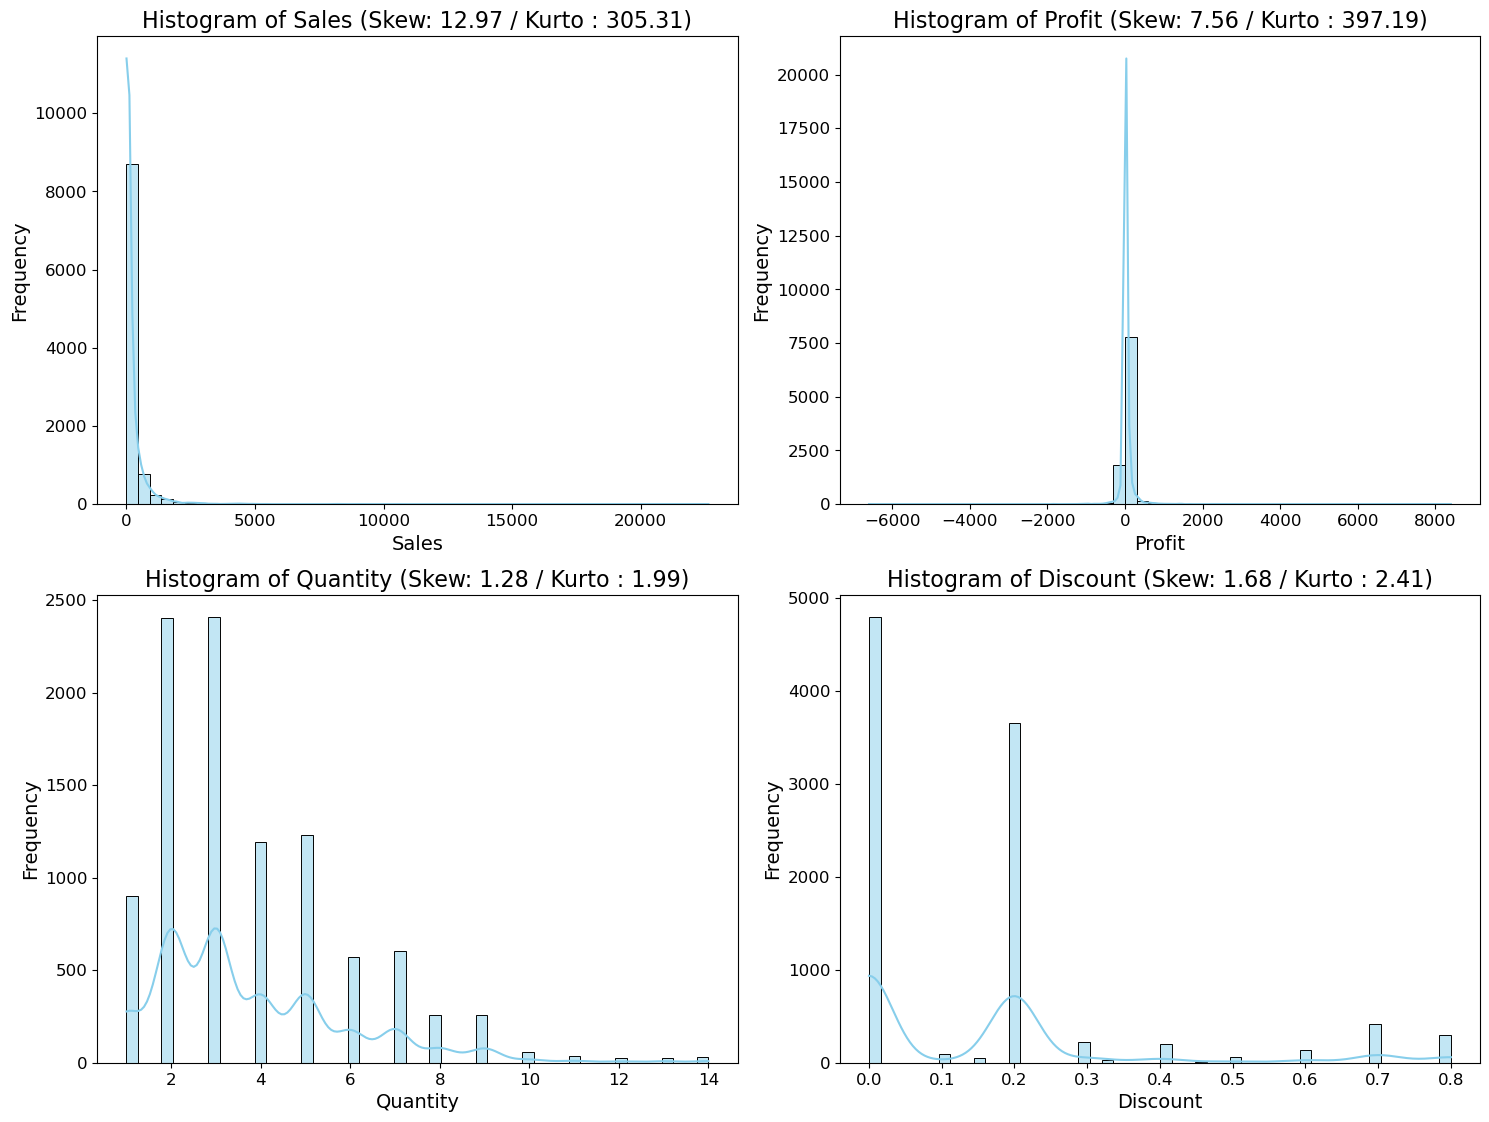

Chart 2.1. 'df_SaaS' Data Distribution

--- Performing normaltest test ---

Sales: 
p-value = 0.0 --> Reject H0: data is not normally distributed.

Profit: 
p-value = 0.0 --> Reject H0: data is not normally distributed.

Quantity: 
p-value = 0.0 --> Reject H0: data is not normally distributed.

Discount: 
p-value = 0.0 --> Reject H0: data is not normally distributed.


In [13]:
# List of columns for target
col_target = ['Sales', 'Profit', 'Quantity', 'Discount']

# Show Visual and Test for Normality
histo_stacked(df_SaaS, col_target, 2, 50)
print('Chart 2.1. \'df_SaaS\' Data Distribution')
normality_test(df_SaaS, col_target, [normaltest], 0.05)

Insight :

All variable reject the null hypothesis (H0) if normality with a p-value of 0.0000. this mean none of the variable follow a normal distribution, and they all exhibit significant skewness. details:

- The data shows significant skewness, especially in prices, sales, and profits, indicating that a small number of high values significantly influence the averages.

- Most values in all categories are on the lower end, with a few high values creating the skewness.

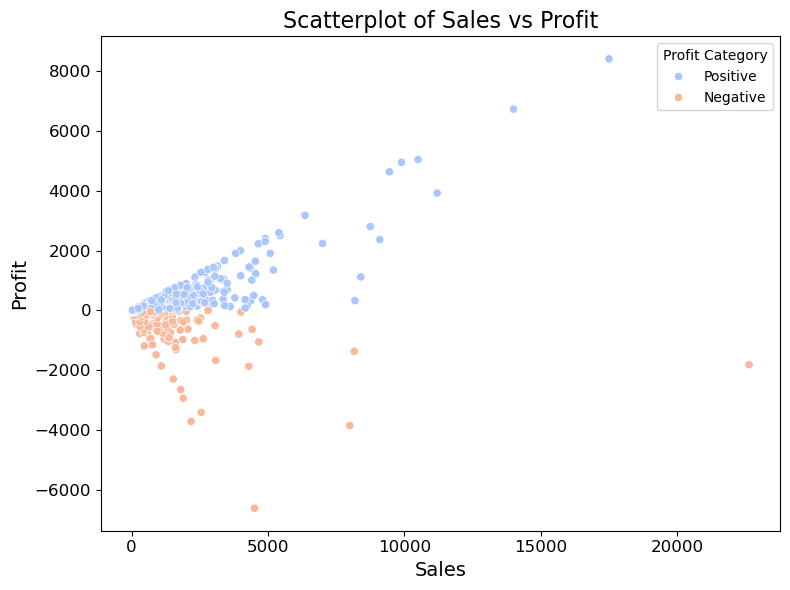

Chart 2.2. Scatterplot of Sales vs Profit


In [14]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df_SaaS, x = 'Sales', y = 'Profit', hue = 'Profit Category', palette = 'coolwarm')
plt.title('Scatterplot of Sales vs Profit', fontsize = 16)
plt.xlabel('Sales', fontsize = 14)
plt.ylabel('Profit', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()
print('Chart 2.2. Scatterplot of Sales vs Profit')

Insight:

- Higher sales generally lead to higher profits. However, the profit growth rate isn't as steep as the sales growth, suggesting that costs increase with sales.

## **2.2 Data Cleaning**

### 2.2.A. Check for NA data

Its important and crucial step to check NA / Empty / Null / Not Available data in dataframe, reason:

- it can significantly affect the quality and reliability of data analysis / models

- Missing values in statistical analysis can lead to incorrect mean, median, variance, or other aggregate calculations

- its important for visualization to have correct data and if there is missing values can may misrespresent trends or distributions

In [15]:
# Show Missing Value from each Columns
df_SaaS.isna().sum()

Order ID                   0
Order Date                 0
Contact Name               0
Customer                   0
Industry                   0
Segment                    0
Country                    0
City                       0
Region                     0
Subregion                  0
Product                    0
Unit Price                 0
Quantity                   0
Discount                   0
Sales                      0
Profit                     0
Profit Category            0
Profit Category Numeric    0
dtype: int64

***THERE ARE NO MISSING DATA IN DATA FRAME***

### 2.2.B. Check for Duplicates Data

Its important to check duplicates information (stacked of data from full rows), reason:

- Data quality used to avoid repeated data and may affect to inflate counts or skew statistics, leading to incorrect conclusions

- Enhance data cleaning and preprocessing = ensuring there is consistent data and no conflicting data

#### A. Outliers Check

In [16]:
# Checking for Any duplicates data in df
duplicated_data = df_SaaS.duplicated().any()

# Count the number of duplicate rows
Numb_Dupicated_rows = df_SaaS.duplicated().sum()

# Checking duplicates rows
dup_rows = df_SaaS[df_SaaS.duplicated()]

print(f'Duplicates Rows :')
display(dup_rows)
print(f'Duplicates data? "{duplicated_data}"') 
print(f'\nNumber of duplicated rows : {Numb_Dupicated_rows}')

Duplicates Rows :


,Order ID,Order Date,Contact Name,Customer,Industry,Segment,Country,City,Region,Subregion,Product,Unit Price,Quantity,Discount,Sales,Profit,Profit Category,Profit Category Numeric
3406,AMER-2020-150119,2020-04-23,Natalie Skinner,Itochu,Finance,Enterprise,Mexico,Mexico City,AMER,LATAM,FinanceHub,200.98,2,0.3,281.372,-12.0588,Negative,0


Duplicates data? "True"

Number of duplicated rows : 1


***THERE ARE NO DUPLICATED DATA***

### 2.2.C. Checking and Cleaning Outliers

In this section, we will focus on identifiying and handling outliers in dataset `df_SaaS`. Outliers can significantly affect the results of our analysis, so it is crucial to detect and address them appropriately

In [17]:
# Create boxplot direct function
def boxplot_outliers(Source, Var):
    """
    Generate boxplots for specified variables in the DataFrame to visualize outliers.
    
    Parameters:
        Var : list
            List of column names to create boxplots for.
        Source : DataFrame
            DataFrame containing the data.
    """
        
    plt.figure(figsize = (14, 13))

    for i, target in enumerate(Var, start=1):
        plt.subplot(len(Var), 1, i)
        sns.boxplot(x = Source[target], color = '#87CEEB')
        plt.title(target, fontsize = 16)

    plt.xticks(fontsize = 12)
    plt.tight_layout()
    plt.show()

# Create table of outliers function
def outliers_table(Source, Var):
    """ 
    Generate a summary table of outliers for specified variables in the DataFrame.

    Parameters: 
        Var : list List of column names to check for outliers. 
        Source : DataFrame DataFrame containing the data. 

    Returns: DataFrame A styled DataFrame summarizing the outliers information. 
    """
    # List to store results
    outliers_info = []

    # Calculate bounds, outliers, and their sums
    for Col_Name in Var:
        
        lower_bound = np.percentile(Source[Col_Name], 25) - 1.5 * iqr(Source[Col_Name])  # Lower bound
        upper_bound = np.percentile(Source[Col_Name], 75) + 1.5 * iqr(Source[Col_Name])  # Upper bound

        # Count number of outliers
        num_outliers = len(Source[(Source[Col_Name] < lower_bound) | (Source[Col_Name] > upper_bound)])

        # Calculate sums of lower and upper outliers
        lower_outliers_sum = Source[Col_Name][Source[Col_Name] < lower_bound].sum()
        upper_outliers_sum = Source[Col_Name][Source[Col_Name] > upper_bound].sum()

        # Append data to list
        outliers_info.append([Col_Name, lower_bound, upper_bound, num_outliers, lower_outliers_sum, upper_outliers_sum])

    # Convert the results into a DataFrame
    outliers_summary_df = pd.DataFrame(

                            # Data source
                            data    = outliers_info,

                            # Columns name for outliers_info 
                            columns = [
                                'Column', 'Lower Bound', 'Upper Bound', 
                                'Outliers QTY', 'Sum of Lower Outliers', 
                                'Sum of Upper Outliers'
                            ]
                        )

    # Set the column as the index for a cleaner display
    outliers_summary_df.set_index('Column', inplace=True)

    # Format numbers to two decimal places
    outliers_summary_df = outliers_summary_df.style.format('{:.2f}')

    # Display the table
    display(outliers_summary_df)

# Shape
def print_shape_1(Source):
    rows, columns = Source.shape
    print(f'''
        \r-------------------------------
        \rAWS SaaS Sales dataframe shape.
        \r-------------------------------\n
        \rRows \t: {rows}
        \rColumns : {columns} ''')

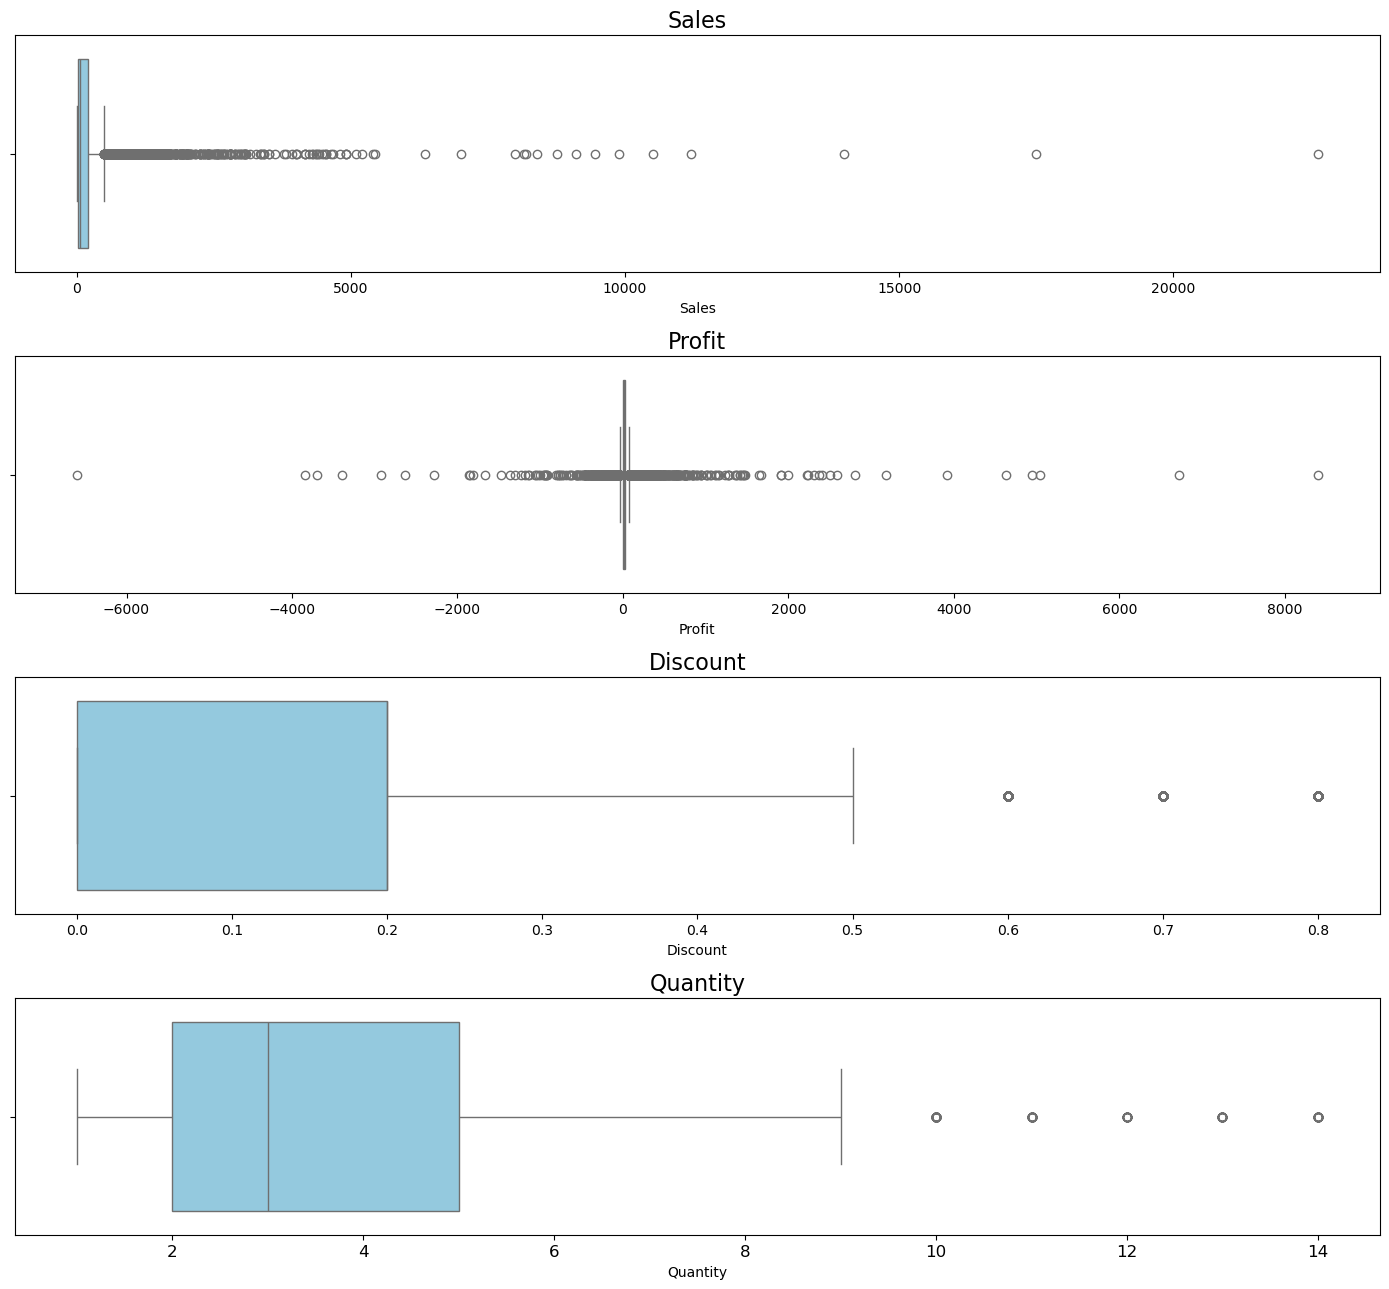

Chart 2.3. Boxplot of Outliers


,Lower Bound,Upper Bound,Outliers QTY,Sum of Lower Outliers,Sum of Upper Outliers
Column,,,,,
Sales,-271.71,498.93,1167.00,0.00,1477482.80
Profit,-39.72,70.82,1881.00,-140327.36,332580.44
Discount,-0.30,0.50,856.00,0.00,615.40
Quantity,-2.50,9.50,170.00,0.00,1977.00


Table 2.1. Outliers Summary

-------------------------------
AWS SaaS Sales dataframe shape.
-------------------------------

Rows 	: 9994
Columns : 18 


In [18]:
# Variable for boxplot
Variables = ['Sales', 'Profit', 'Discount', 'Quantity']

# Re-call function
boxplot_outliers(df_SaaS, Variables)
print('Chart 2.3. Boxplot of Outliers') 
outliers_table(df_SaaS, Variables)
print('Table 2.1. Outliers Summary')
print_shape_1(df_SaaS)

##### Insight :

- `Price` and `Sales` : These metrics have a large number of outliers, indicating variability in pricing and sales figures, with some very high values.

- `Profit` : There is a significant spread around zero, with both positive and negative outliers, reflecting varied business performance.

- `Discount` : Shows a relatively more stable distribution with fewer extreme values.

- `Quantity` : Most of the data points are around lower values, with fewer outliers at the higher end.

##### Columns :

- `Price` : The data is concentrated near the lower end, with a significant number of outliers extending up to around 7000.

- `Sales` : The data is heavily skewed towards the lower end, with outliers reaching up to 20000.

- `Profit` : The data is centered around zero, with outliers extending both negatively and positively, indicating a wide range of profit values.

- `Discount` : The data shows a more uniform distribution with fewer outliers.

- `Quantity` : The data is concentrated around lower values, with outliers extending up to 14.

#### B. Outliers Cleaning


In [19]:
# out_check = df_SaaS[(df_SaaS['Profit'] < -1500)]
out_check = df_SaaS[(df_SaaS['Profit'] < -2000) | (df_SaaS['Profit'] > 2000)]
out_check.drop(columns = ['Order ID', 'Order Date', 'Profit Category', 'Profit Category Numeric'], inplace = True)
out_check.reset_index(drop = True, inplace = True)

# Display the result
display(out_check, 'Table 2.2. Outliers Check')

# Check normality of filtered data
normality_test(out_check, col_target, [kstest], 0.05)

,Contact Name,Customer,Industry,Segment,Country,City,Region,Subregion,Product,Unit Price,Quantity,Discount,Sales,Profit
0,Eric Forsyth,Lukoil,Energy,SMB,Finland,Helsinki,EMEA,NOR,ContactMatcher,1270.99,5,0.0,6354.950,3177.4750
1,Emily Fisher,Costco Wholesale,Retail,Strategic,Sweden,Gothenburg,EMEA,NOR,Big Ol Database,3999.99,4,0.5,7999.980,-3839.9904
2,Alison Davidson,Fannie Mae,Finance,SMB,United Kingdom,Woking,EMEA,UKIR,Big Ol Database,699.99,7,0.0,4899.930,2400.9657
3,Jennifer Payne,Trafigura Group,Finance,Enterprise,United Kingdom,London,EMEA,UKIR,Alchemy,3499.99,4,0.2,11199.968,3919.9888
4,Joshua Vaughan,FedEx,Transportation,Enterprise,Russia,Moscow,EMEA,EU-EAST,Big Ol Database,1699.99,5,0.7,2549.985,-3399.9800
5,Sean Rees,Walgreens,Retail,SMB,Mexico,Monterrey,AMER,LATAM,Big Ol Database,2999.99,2,0.7,1799.994,-2639.9912
6,Deirdre McDonald,Anthem,Healthcare,SMB,Luxembourg,Luxembourg,EMEA,EU-WEST,ContactMatcher,1889.99,5,0.0,9449.950,4630.4755
7,Austin Peters,Lowes,Retail,SMB,Philippines,Manila,APJ,APAC,Alchemy,3499.99,3,0.0,10499.970,5039.9856
8,Kevin Wilkins,Lowes,Retail,Strategic,Argentina,Buenos Aires,AMER,LATAM,Big Ol Database,1299.99,7,0.0,9099.930,2365.9818
9,Ruth Vaughan,Ford Motor,Manufacturing,Strategic,Australia,Sydney,APJ,ANZ,ContactMatcher,1889.99,5,0.8,1889.990,-2929.4845


'Table 2.2. Outliers Check'


--- Performing kstest test ---

Sales: 
p-value = 0.0 --> Reject H0: data is not normally distributed.

Profit: 
p-value = 1.1202244133442131e-10 --> Reject H0: data is not normally distributed.

Quantity: 
p-value = 1.427829112074597e-36 --> Reject H0: data is not normally distributed.

Discount: 
p-value = 1.3060373246459316e-05 --> Reject H0: data is not normally distributed.


Cleaning outliers is done by removing outliers from the numerical columns, due to their ability to skew the results of analysis. By finding `Q1`, `Q3`, `IQR` (Interquartile Range) and using `Q1 - 1.5 * IQR` to find `lower bound` and `Q3 + 1.5 * IQR` to find `upper bound`. This process ensure that the dataset is free from extreme values that could potentially distort the analysis.

But in this scenario, removing outliers might not be the best solution. these why:

- The Frequency of Sales (Kurtosis : 305.31) and Profit (Kurtosis : 397.19) are extremly high. tightened the outliers or extreme data will not help any cleaning process. it will make sharp peaks compared to a normal distribution, and if we also reduce the sharpness to acceptable point, it will impact the integrity of the data.

- Based on `Table 2.2. Outliers Check` those extreme data aren't just mistake data, or something that out of ordinary. its just either "High Unit Price" with "Large Quantity" and "Small Discount", or "Low Unit Price" with "Substantial Quantity" and "High Discount", etc.

- After performing normality test with trial and error to find expected H0 as normally distributed, it wont happen due to high Kurtosis

- The outliers might represent genuine data points and by cleaning them out could result in an incomplete data structure or biased dataset.

- (Disclaimer) I already tried to cut by each Numerical Columns `Upper and Lower Bound` and several other ways. The result are missing important data for this analysis goals one of them are Discount limited to " 0.5 ", and this analysis goals lays on Discount more than " 0.5 " (" 0.6 "  -  " 0.8 ")

Solution for this scenario is:

- Not using average (mean) or standard deviation (std) in any calculation. Skewness impact average but not median, by that all calculation will use median or Interquartile (IQR) if needed

- Spearman method use for correlation matrix between numerical columns

- It can be splitted to 3 profit or sales category as "High", "Moderate", and "Low" sales/profit, but its not necessary for this analysis goals.

***CONCLUSION** : There will no outliers cleaning or any modifying of this not normal distributed Dataset

# **3. Data Analysis**
- Data visualization
- Insight

## **3.1. AWS SaaS Overal Performance and Trends**

This section presents an in-depth examination of the profit and loss percentages, providing a comprehensive understanding of financial performance. Profit or loss percentages offer crucial insights into the overall health and efficiency of business operations. By analyze trend movements in sales and profit data. This involves preparing the data, visualizing it, and analyzing the trends to gain insights into the overall performance over time.

### 3.1.a. Performance and Trends Preparation

To prepare the data for performance and trends, we will follow this steps:

#### - **Create piechart for proportion**: A pie chart is use to represent the proportions of profit and loss. The chart segments are color-coded to distinguish between positive profits and negative losses.

In [20]:
# Create function for percentage of min and plus value of numeric columns
def min_plus_pie(source, cols):
    """
    Create a pie chart to visualize the distribution of negative and positive values of a numeric column.

    Parameters:
    - source: DataFrame containing the data
    - cols  : Column name for which the distribution is to be visualized
    """
    sizes = [abs(source[source[cols] <= 0][cols].sum()), source[source[cols] > 0][cols].sum()]
    labels = ['Loss\n(Negative)', f'{cols}\n(Positive)']
    colors = ['lightcoral', 'lightblue']            # color for the pie chart
    explode = (0.1, 0)                              # explode the negative profits slice

    # Function to customize autopct to include USD sums below percentages
    def autopct_with_sum(pct):
        total = sum(sizes)
        absolute = round(pct / 100.0 * total, 2)
        return f"{pct:.1f}%\n$ {absolute:,.2f}"     # Format the absolute value as USD

    plt.figure(figsize = (8, 8))
    plt.pie(
        sizes, 
        labels     = labels, 
        colors     = colors, 
        autopct    = autopct_with_sum, 
        startangle = 140, 
        explode    = explode
    )
    plt.title(f'{cols} Percentage', fontsize = 22)
    plt.text(0.95, -1, 
        f'   Total Sales: $ {source['Sales'].sum():,.2f}\nTotal {cols}: $ {source[cols].sum():,.2f}', 
        ha = 'center', 
        fontsize = 12
    )
    plt.axis('equal')                               # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

#### - **Create linechart**: A line chart is used to represent the trends in profit and loss over the specified periods. The chart employs distinct color-coded lines to differentiate between profit and loss metrics.

In [21]:
# Create trend plot function for sales, profit, and loss over time
def sales_profit_loss_trend(source, x_col, y1_col, y2_col, y3_col, title):
    """
    Create a line plot to visualize the trend of sales, profit, and loss over time with enhanced visualization.

    Parameters:
    - source: DataFrame containing the combined data of sales, profit, and loss
    - x_col : Column name for the x-axis values
    - y1_col: Column name for the sales values
    - y2_col: Column name for the profit values
    - y3_col: Column name for the loss values
    - title: Title of the chart
    """
    # Adjust canvas size
    plt.figure(figsize = (15, 10))

    # Define colors and labels
    coolwarm_colors = plt.get_cmap('coolwarm')
    colors = {
        y1_col: coolwarm_colors(0.2),  # Cool color for Sales
        y2_col: 'green',               # Green color for Profit
        y3_col: coolwarm_colors(0.8)   # Warm color for Loss
    }
    y_cols = [y1_col, y2_col, y3_col]

    # Create line plots and annotations
    for y_col in y_cols:
        sns.lineplot(
            data  = source, 
            x     = x_col, 
            y     = y_col, 
            ci    = None, 
            label = y_col, 
            color = colors[y_col]
        )
        for x, y in zip(source[x_col], source[y_col]):
            plt.text(
                x, y, f"$ {y:,.0f}", 
                fontsize = 11, 
                color    = colors[y_col], 
                ha       = 'center', 
                va       = 'bottom' if y_col != y3_col else 'top'
            )

    # Add a title and labels
    plt.title(title, fontsize = 22)
    plt.xticks(rotation = 0, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xlabel(f'{x_col}', fontsize = 14)
    plt.ylabel(f'{y1_col} / {y2_col} / {y3_col} \n', fontsize = 14)
    plt.grid(
        axis      = 'y', 
        color     = 'black', 
        linestyle = (0, (5, 10)), 
        linewidth = 0.8
    )

    # Add a legend
    plt.legend(title = 'Legend', fontsize = 12, title_fontsize = 14)

    # Display the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

#### - **Creating temporary table**: by grouping datetime to 'Q' for Profit, Sales, and Loss calculation. These how:

- create a new dataset `df_date` by adding a 'Quarter' column to the original dataset `df_SaaS`, which assigns each 'Order Date' to the corresponding Date_Type.

- group this data by quarter to summarize profit in `date_profit` and sales in `date_sales`, dividing the sales values by 10.

- create a 'Loss' column in `df_date` containing only the negative profit values, which are then summarized by quarter in quarter_loss and converted to positive numbers for better representation.

- merge summarized datasets into a single DataFrame `df_sales_loss_profit`, converting the 'Date_Type' column to string format.

In [22]:
# Duplicate dataset to df_date and create Date_Type column
df_date = df_SaaS.assign(Date_Type = pd.PeriodIndex(df_SaaS['Order Date'], freq = 'Q'))

# Group by quarter and summarize profit, sales (divided by 10), and loss (negative profits)
df_sales_loss_profit = (
        df_date.assign(Loss = lambda x: x['Profit'].apply(lambda y: y if y < 0 else 0),
                    Profit = lambda x: x['Profit'].apply(lambda y: y if y > 0 else 0))
                .groupby('Date_Type', as_index = False)
                .agg({
                    'Profit': 'sum',
                    'Sales': lambda x: x.sum(),
                    'Loss': lambda x: abs(x.sum())
                }
        )
)

# Convert 'Date_Type' column to string format for plotting
df_sales_loss_profit['Date_Type'] = df_sales_loss_profit['Date_Type'].astype(str)

# Rename columns for clarity
df_sales_loss_profit.columns = ['Quarter', 'Profit', 'Sales', 'Loss']

# Display the resulting DataFrame
display(df_sales_loss_profit.head(10),'Table 3.1. Quarterly Performance')

,Quarter,Profit,Sales,Loss
0,2020Q1,9005.7172,74447.7960,5194.4882
1,2020Q2,15180.8986,86538.7596,3976.8294
2,2020Q3,25668.2651,143633.2123,12863.5433
3,2020Q4,31581.8649,179627.7302,9857.9108
4,2021Q1,15106.8288,68851.7386,5841.8872
5,2021Q2,18202.7662,89124.1870,6011.8438
6,2021Q3,24223.7517,130259.5752,7370.1323
7,2021Q4,36614.6479,182297.0082,13305.5276
8,2022Q1,16557.7572,92596.4190,5111.4157
9,2022Q2,23251.5915,135370.1130,7166.6860


'Table 3.1. Quarterly Performance'

### 3.1.b. Chart Visualization

To conduct this analysis, we categorize the data into profits and losses. The sums of these categories are calculated to understand the proportions they represent within the total dataset. This approach allows us to visualize the financial distribution effectively.

#### 1. Pie Chart

This pie chart is taken from `df_SaaS` dataset and profit column

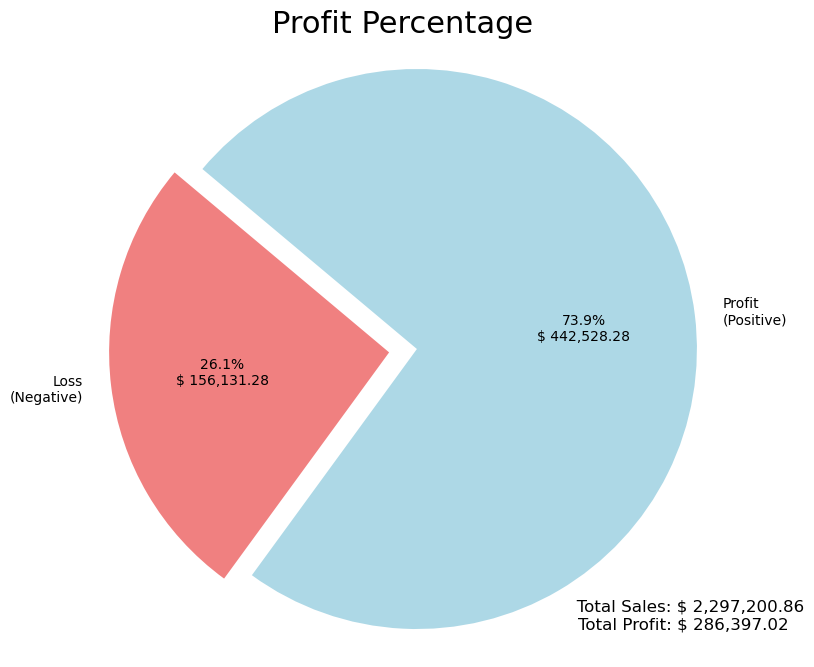

Chart 3.1. Profit and Loss Percentage


In [23]:
# Recall fucntion for percentage of min and plus value of profits
min_plus_pie(df_SaaS, 'Profit')
print('Chart 3.1. Profit and Loss Percentage')

Insight:

- The pie chart shows that Positive Profits make up the majority of the total profits, accounting for `74 %` (USD 442,5 Thousand). on the other hand, Loss accounting at `26 %` (USD -156,1 Thousand) of the total profits.

- The business is financially healthy overall, with a significant portion being `Positive`. however, the presence of `Loss`, while smaller, indicates area that may need attention and improvement to further enchance financial performance. Focusing on reducing these negative areas can help in achieving even greater profitability.

By analyzing the proportions of profit and loss, stakeholders can gain valuable insights into the financial performance and identify areas for improvement. This analysis is pivotal for strategic planning and decision-making, ensuring sustainable growth and profitability.

Profit Margins: $$ \text{Profit Margin} = \left( \frac{\text{Total Profit}}{\text{Total Sales}} \right) \times 100 $$ $$ \text{Profit Margin} = \left( \frac{286,397}{2,297,200} \right) \times 100 \approx 12.5\% $$


#### 2. Trend Line Chart

This Trend line below is taken from `df_sales_profit` dataset that recently created in `Tabel 3.1. Quarterly Performance` 

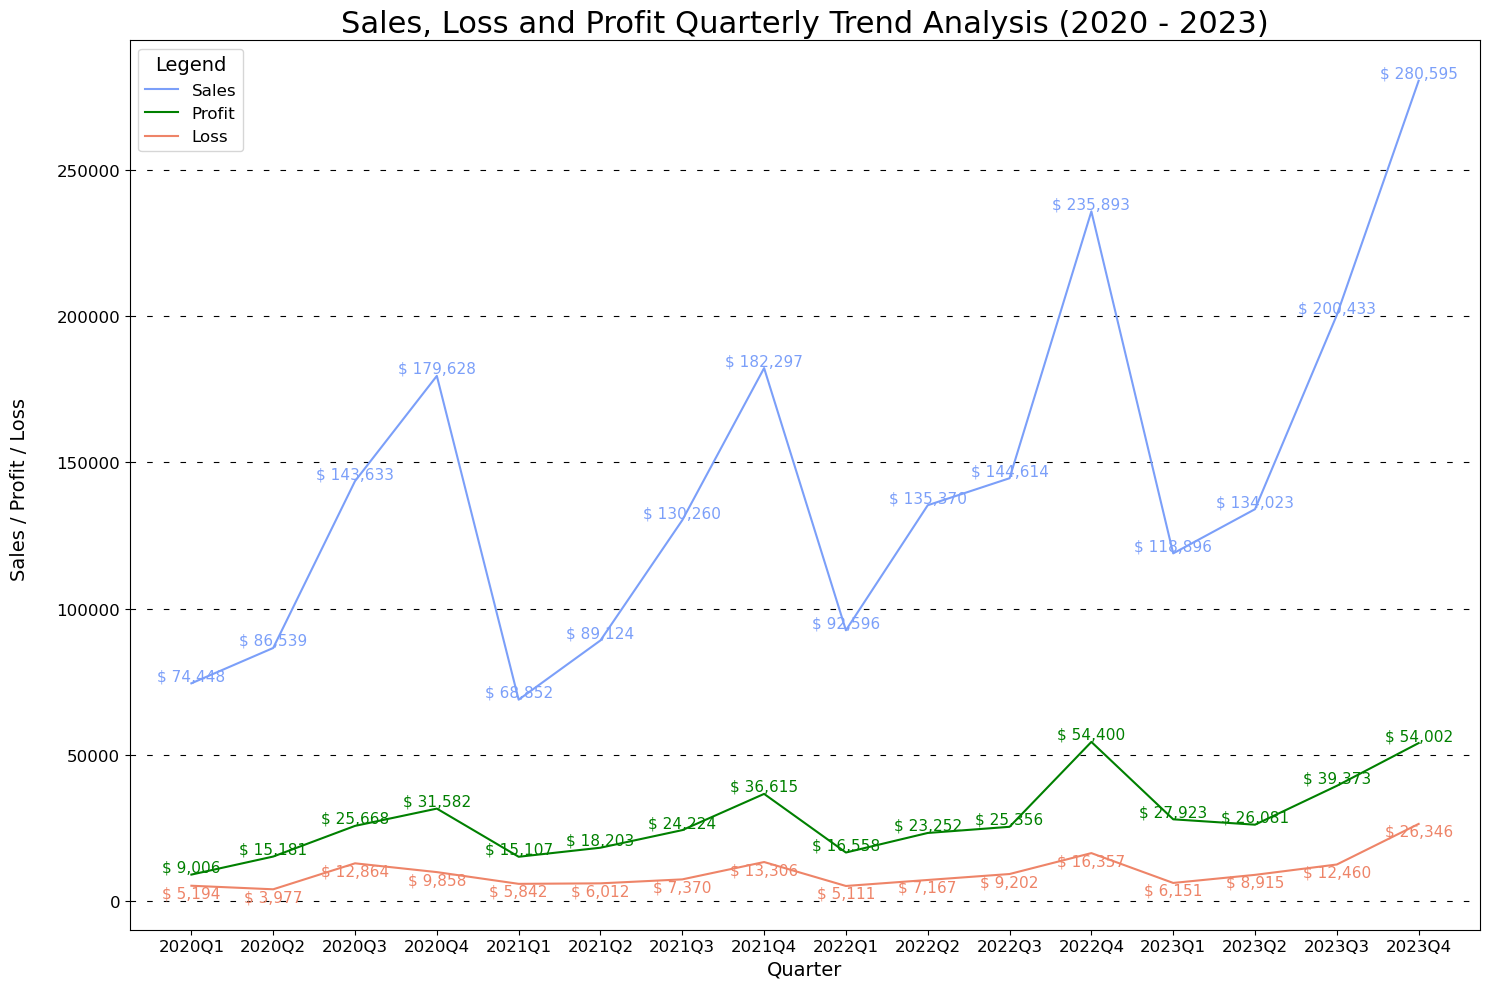

Chart 3.2. Sales, Loss, and Profit Quarterly Trend Analysis (2020 - 2023)


In [24]:
# Recall function for trend movement over the years
sales_profit_loss_trend(
        df_sales_loss_profit, 'Quarter', 'Sales', 'Profit', 'Loss', 
        'Sales, Loss and Profit Quarterly Trend Analysis (2020 - 2023)'
)
# Chart Number and Name
print('Chart 3.2. Sales, Loss, and Profit Quarterly Trend Analysis (2020 - 2023)')

Insight:

- There appear to be seasonal trends with certain quarters consistently showing higher sales and profits. For example, Q4 (year-end) often shows increased sales and profit, likely due to Customer (Company) Strategic Spending consist of subscription renewal / upgrades, or End-of-Year Budget Utilization.

- AWS SaaS sales have shown a substantial upward trend over the period. Starting at $64,852 in Q3 2020 and reaching a peak of $280,595 in Q4 2023. Which mean high customer satisfaction and loyalty.

- Despite losses have generally lower compared to profits. There are noticeable pattern where first year at Q3 2020 spike, it might due to marketing campaign aimed at Q4 Strategic Company Spending. Subsequent marketing strategies seem to align with Q4 pattern.

- Overall Q4 sales and profit are increase overtime.

## **3.2. Variable Correlation**

Correlation is important to understand and quantifies the degree to which two variables are related. A positive correlation implies that as one variable increases, the other tends to increase as well, and a negative correlation indicates that as one variable increases, the other tends to decrease.

In the heatmap, each cell represents the correlation coefficient between two variables. The values range from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

### 3.2.a. Heatmap Visualization Function for Correlation

#### - **Create Correlation Heatmap**: Taking numerical type columns by select_dtype "int64" and "float64". Spearman method used due to not normal distribution dataset as solution in `Outliers Cleaning` section

In [25]:
# Numeri columns for correlation heatmap
def correlation_heatmap(source, title):
    """
    Create a triangular correlation heatmap from the given dataset.

    Parameters:
        - source  : DataFrame containing the data
        - title   : Title for the chart
    """
    
    # Replace this with your actual `df_SaaS` dataset
    df = source.copy()

    # Select relevant numerical columns of type int64 and float64
    num_col = df.select_dtypes(include=['int64', 'float64']).columns

    # Compute correlation matrix
    correlation_matrix = df[num_col].corr(method = 'spearman')

    # Create a mask for the upper triangle for easier readability
    mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))

    # Plot the heatmap with the mask
    plt.figure(figsize = (13, 10))
    sns.heatmap(
        correlation_matrix, 
        annot       = True, 
        cmap        = 'coolwarm', 
        fmt         = ".2f", 
        cbar        = True,
        mask        = mask,
        xticklabels = num_col, 
        yticklabels = num_col,
        annot_kws   = {'size' : 12}
    )
    plt.title(title, fontsize = 16)
    plt.xticks(rotation = 0, ha = 'right', fontsize = 12)
    plt.yticks(rotation = 0, fontsize = 12)
    plt.text(0.6, 0.25, 'PC_N = Profit Category Numeric', fontsize = 12, transform = plt.gcf().transFigure)
    plt.tight_layout()
    plt.show()

### 3.2.b. Chart Visualization

#### 1. Correlation Heatmap

This chart is directly taken from `df_SaaS` dataset and modified column name from "Profit Category Numeric" "into PC_N" due to over stacked word and also saving space if rotate 45 degree the xticks

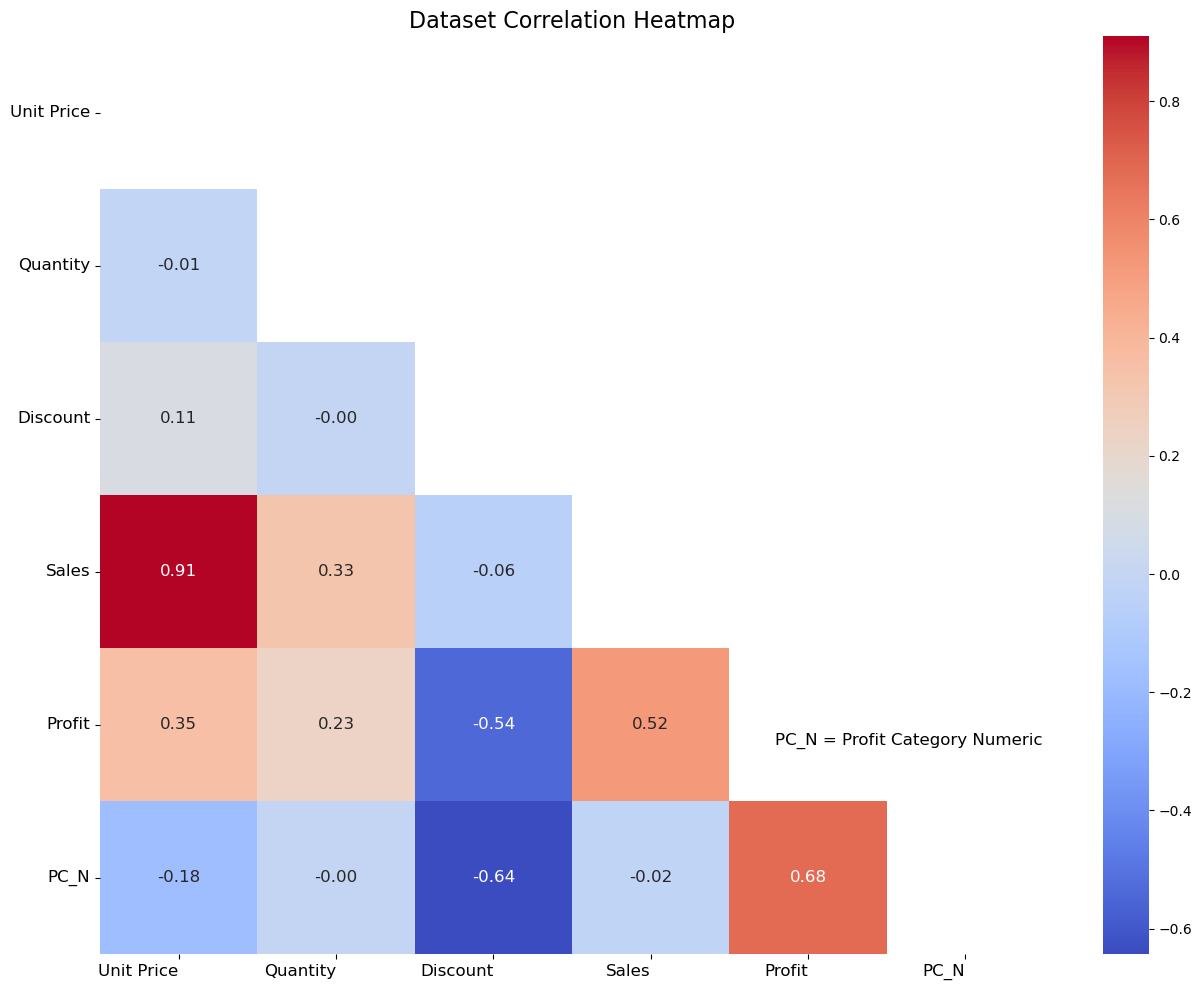

Chart 3.3. Correlation Heatmap


In [26]:
# Recall heatmap function
correlation_heatmap(df_SaaS.rename(columns = {'Profit Category Numeric' : 'PC_N'}), 'Dataset Correlation Heatmap')
print('Chart 3.3. Correlation Heatmap')

Insight:

1. `Profit Category Numeric` and `Discount`: Strong negative relationship

    - As discount increase, often of having a positive profit decreases. or higher discount are associated with higher losses

2.  `Profit Category Numeric` and `Profit` : (Ignored)

    - PC_N is direct equation from Profit, Negative Profit as 0 and Positive Profit as 1 in profit category Numeric (PN_C)

2.  `Sales` and `Profit` : Moderate positive relationship

    - Higher sales generally lead to higher profits. It makes sense since selling more products or services generally leads to higher revenue and, subsequently, higher profits.

3. `Discount` and `Profit`: Strong negative relationship

    - Giving more discounts typically results in lower profits. While discounts can drive sales, they also reduce the profit margin on each sale, which can lead to an overall decrease in profit. 

4. `Unit Price` and `Profit` : Moderate positive relationship

    - Higher unit price resulting higher profit. Consideration should be given to pricing strategies that balance competitive pricing with profit maximization. Higher prices can lead to higher profits, but it's essential to ensure that this doesn't negatively impact sales volume.

5. `Quantity` and `Sales` : Moderate positive relationship

    - this suggest that more larger of product quantity leads to higher sales

From these heatmap correlation, shows a distinct relationship in "profit category" and "Discount" (- 0.64) which we will dive in more why it can happen. and These insights can help us understand how different business variables are related and make more informed decisions.

## **3.3. Discount Evaluation**

From `Chart 3.3. Correlation Matrix of Variables`, discount contribute highest loss (- 0.64) rather than other correlation, by that it will need further analysis to achieve point 2 in goals. to evaluate the relationship between discount and profit which in `Chart 3.3.` called Profit Category ('Negative', 'Positive') involves preparing data, visualizing, and analysing the result to gain insight into why discount impact is minus `-`.

### 3.3.a. Preparation for Discount Evaluation

To prepare the data for discount evaluation, we will follow these steps:

#### - **Create 2 Barplot Chart Function**: Define function to plot the spread of discount value by `Profit Category`, and Transaction loss / profit and frequency by discount.

In [27]:
# Create a function to visualize the distribution of discounts by profit category
def boxplot_col_by_profit_category(source, discount_col, title, ax = None):
    """
    Create a box plot to visualize the discount distribution by profit category.

    Parameters:
    - source: DataFrame containing the data
    - discount_col: Column name for the discount values (e.g., 'Discount')
    - title: Title of the chart
    - ax: Matplotlib Axes object (default is None)
    """

    if ax is None:
        plt.figure(figsize = (10, 8))
        ax = plt.gca()

    sns.boxplot(
        data    = source,
        y       = 'Profit Category',
        x       = discount_col,
        palette = {'Negative': '#FF4C4C', 'Positive': '#87CEEB'},
        ax      = ax
    )
    ax.set_title(title, fontsize = 22)
    ax.set_xlabel(discount_col, fontsize = 14)
    ax.set_ylabel('Profit Category', fontsize = 14)
    ax.tick_params(axis = 'both', labelsize = 12)
    ax.grid(
        axis        = 'y', 
        color       = 'black', 
        linestyle   = (0, (5, 10)), 
        linewidth   = 0.4
    )

    if ax is None:
        plt.tight_layout()
        plt.show()

# Create function for loss and frequency of transactions by discount
def plotLossProfit_and_countsBars(data, x_col, value_col, count_col, title, value_type='Loss'):
    """
    Create a combined bar chart for sum of losses or profits and count of transactions by discount.

    Parameters:
    - data: DataFrame containing the data
    - x_col: Column name for the x-axis (e.g., 'Discount')
    - value_col: Column name for the sum of values (e.g., 'Sum_Loss' or 'Sum_Profit')
    - count_col: Column name for the count of transactions (e.g., 'Count_Transactions')
    - title: Title of the chart
    - value_type: Type of value to plot ('Loss' or 'Profit')
    """
    
    fig, ax1 = plt.subplots(figsize = (15, 8))

    # Bar for sum of losses or profits
    bar_width = 0.5
    bars1 = ax1.bar(
        data[x_col].astype(str),
        data[value_col],
        color = 'tab:blue',
        alpha = 0.8,
        width = bar_width,
        label = f'Sum of {value_type}s'
    )
    ax1.set_ylabel(f'Total {value_type}s $', fontsize = 14)
    ax1.tick_params(axis = 'y', labelsize = 12)
    ax1.set_xlabel('\nDiscount', fontsize = 14)
    plt.xticks(rotation = 0, fontsize = 12)

    # Add text labels for sum of losses or profits
    for bar in bars1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.1f}', ha = 'center', va = 'bottom', fontsize = 12)

    # Set tighter x-axis limits
    ax1.set_xlim(-0.1, len(data[x_col]) - 0.4)

    # Bar for count of transactions
    ax2 = ax1.twinx()
    bars2 = ax2.bar(
        data[x_col].astype(str),
        data[count_col],
        color = 'tab:red',
        alpha = 0.8,
        width = bar_width,
        label = 'Count of Transactions',
        align = 'edge'
    )
    ax2.set_ylabel(f'\n{value_type} Transactions Frequency', color = 'red', fontsize = 14)
    ax2.tick_params(axis = 'y', labelcolor='red', labelsize = 12)

    # Add text labels for count of transactions
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha = 'center', va = 'bottom', fontsize = 12, color = 'red')

    # Combine legends from both axes
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    handles = handles1 + handles2
    labels = labels1 + labels2

    # Add a single legend to the plot
    fig.legend(handles, labels, loc = 'upper left', bbox_to_anchor=(0.4, 0.95), fontsize = 12)

    # Title and layout adjustments
    plt.title(title, fontsize = 16)
    fig.tight_layout()
    plt.grid(visible = True, linestyle = (0, (5, 10)), alpha = 1, color = 'red', axis = 'y')

    # Show the chart
    plt.tight_layout()
    plt.show()

#### - **Create Scatterplot Chart Functions**: Define functions to plot the relationship between discounts, loss and profits metrics.

In [28]:
# Create function to visualize the relationship between discount and profit
def uni_enhanced_scatterplot(source, discount_col, y_col, title, ax=None):
    """
    Create a scatter plot to visualize the relationship between discount and profit.

    Parameters:
    - source       : DataFrame containing the dataset
    - discount_col : Column name for the discount values
    - y_col        : Flexible dtype columns for y axis
    - title        : Title of the chart
    - ax           : Matplotlib Axes object (default is None)
    """
    data = source.copy()

    if y_col in data.select_dtypes(include = ['float64', 'int64']).columns:
        if ax is None:
            plt.figure(figsize = (10, 8))
            ax = plt.gca()

        sns.scatterplot(
            data    = data, 
            x       = discount_col, 
            y       = y_col, 
            hue     = data[y_col] <= 0,
            palette = {True: '#FF4C4C', False: '#87CEEB'}, 
            alpha   = 0.7, 
            ax      = ax
        )

        ax.axhline(0, color = 'black', linestyle = '--', linewidth = 1)
        ax.set_title(title, fontsize = 22)
        ax.set_xlabel(discount_col, fontsize = 12)
        ax.set_ylabel(y_col, fontsize = 12)
        ax.legend(['Break-Even (Profit = 0)', 'Profits', 'Loss'], loc = 'upper right')
        ax.grid(
            axis      = 'y', 
            color     = 'black', 
            linestyle = (0, (5, 10)), 
            linewidth = 0.4
        )

        if ax is None:
            plt.tight_layout()
            plt.show()
    else:
        data['Product_Numeric'] = LabelEncoder().fit_transform(data[y_col])
        plt.figure(figsize=(10, 8))
        sns.scatterplot(
            data  = data, 
            y     = y_col, 
            x     = discount_col, 
            alpha = 0.7, 
            color = '#87CEEB'
        )

        plt.title(title, fontsize = 22)
        plt.xlabel(discount_col, fontsize = 14)
        plt.ylabel(y_col, fontsize = 14)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.grid(visible = True, linestyle = (0, (5, 10)), alpha = 0.5)
        plt.tight_layout()
        plt.show()

#### - **Group by Discount**: Count each loss and total loss for each discount level to see where the most significant losses are occuring.

In [29]:
# Group by 'Discount' and calculate count and total negative profit
discount_analysis_loss = (df_SaaS[df_SaaS['Profit'] <= 0]  # Filter for negative profits
    
    # Group by 'Discount' and aggregate                
    .groupby('Discount', as_index = False)
    .agg(
        Count = ('Profit', 'count'),              # Count transaction with this discount
        Loss = ('Profit', lambda x: abs(x.sum())) # Sum of negative profits
    )
    # .sort_values(by = 'Loss', ascending = False)      # Sort by Total_Negative_Profit to see the biggest losses
)

# Show
display(discount_analysis_loss, 'Table 3.2. Discount Analysis')

,Discount,Count,Loss
0,0.00,30,0.0000
1,0.10,4,29.2744
2,0.15,17,328.7030
3,0.20,524,17258.0654
4,0.30,221,10777.6879
5,0.32,27,2391.1377
6,0.40,180,25787.8268
7,0.45,11,2493.1111
8,0.50,66,20506.4281
9,0.60,138,5944.6552


'Table 3.2. Discount Analysis'

In [30]:
# Group by 'Discount' and calculate count and total positive profit
discount_analysis_profit = (df_SaaS[df_SaaS['Profit'] >= 0]  # Filter for negative profits
    
    # Group by 'Discount' and aggregate                
    .groupby('Discount', as_index = False)
    .agg(
        Count = ('Profit', 'count'),              # Count transaction with this discount
        Profit = ('Profit', lambda x: abs(x.sum())) # Sum of negative profits
    )
)

# Show
display(discount_analysis_profit, 'Table 3.3. Profit Discount Analysis')

,Discount,Count,Profit
0,0.00,4798,320987.6032
1,0.10,90,9058.4514
2,0.15,35,1747.6945
3,0.20,3155,107595.3714
4,0.30,19,408.4105
5,0.40,26,2730.7764


'Table 3.3. Profit Discount Analysis'

In [31]:
cols_to_analyze = ['Subregion', 'Product']
results = {}

for col in cols_to_analyze:
    # Calculate the total discount usage for each col value
    discount_usage_total = df_SaaS.groupby(col)['Discount'].count().reset_index(name = 'TotalDiscountUsage')

    # Sort the col values by total discount usage
    sorted_values = discount_usage_total.sort_values(by = 'TotalDiscountUsage', ascending = False)

    # Select top 5 and bottom 5 values
    top_5_values = sorted_values.head(10)[col]
    bottom_5_values = sorted_values.tail(10)[col]

    # Combine the top 5 and bottom 5 values
    selected_values = pd.concat([top_5_values, bottom_5_values])

    # Filter the original dataframe to only include selected values
    df_filtered = df_SaaS[df_SaaS[col].isin(selected_values)]

    # Count the number of times each discount is used by each col value
    discount_usage = df_filtered.groupby([col, 'Discount']).size().unstack(fill_value = 0)

    # Add the total discount usage to the heatmap
    discount_usage['Total'] = df_filtered.groupby(col)['Discount'].count()

    # Sort the heatmap by the total discount usage
    discount_usage = discount_usage.sort_values(by = 'Total', ascending = False)

    # Move 'Total' to the first col
    cols = list(discount_usage.columns)
    cols = [cols[-1]] + cols[:-1]
    discount_usage = discount_usage[cols]

    # Store the result in the dictionary
    results[col] = discount_usage

# Access the results for each col
subregion_result = results['Subregion']
Product_result = results['Product']

display(subregion_result, 'Table 3.4. Subregion Total Transaction and Discount Distribution')   
display(Product_result, 'Table 3.5. Product Total Transaction and Disocunt Distribution')


Discount,Total,0.0,0.1,0.15,0.2,0.3,0.32,0.4,0.45,0.5,0.6,0.7,0.8
Subregion,,,,,,,,,,,,,
NAMER,2507,1604,0,52,851,0,0,0,0,0,0,0,0
EU-WEST,1614,513,0,0,759,37,0,82,11,21,0,191,0
UKIR,1267,945,76,0,218,0,0,28,0,0,0,0,0
LATAM,1158,445,18,0,464,25,0,67,0,17,0,122,0
JAPN,985,0,0,0,570,94,27,13,0,0,81,0,200
ANZ,529,26,0,0,275,53,0,0,0,18,57,0,100
NOR,489,236,0,0,201,4,0,8,0,4,0,36,0
APAC,447,427,0,0,9,11,0,0,0,0,0,0,0
MEA,396,195,0,0,160,2,0,8,0,2,0,29,0


'Table 3.4. Subregion Total Transaction and Discount Distribution'

Discount,Total,0.0,0.1,0.15,0.2,0.3,0.32,0.4,0.45,0.5,0.6,0.7,0.8
Product,,,,,,,,,,,,,
ContactMatcher,1842,409,0,0,644,54,0,75,11,36,0,380,233
Support,1560,974,0,0,586,0,0,0,0,0,0,0,0
FinanceHub,981,372,76,0,375,158,0,0,0,0,0,0,0
SaaS Connector Pack,957,571,0,0,248,0,0,0,0,0,138,0,0
Site Analytics,889,311,0,0,469,0,0,109,0,0,0,0,0
Marketing Suite - Gold,846,530,0,0,316,0,0,0,0,0,0,0,0
ChatBot Plugin,796,498,0,0,298,0,0,0,0,0,0,0,0
Data Smasher,775,471,0,0,304,0,0,0,0,0,0,0,0
OneView,466,271,16,0,112,0,0,0,0,0,0,0,67


'Table 3.5. Product Total Transaction and Disocunt Distribution'

### 3.3.b. Chart Visualization

This chart has 2 source which one is directly taken from `df_SaaS` dataset, and the other one is from temporary table `discount_analysis_loss` (Table 3.2. Loss Discount Analysis) and `discount_analysis_profit` (Table 3.3. Profit Discount Analysis)

#### 1. Scatter and Box to support each visualization

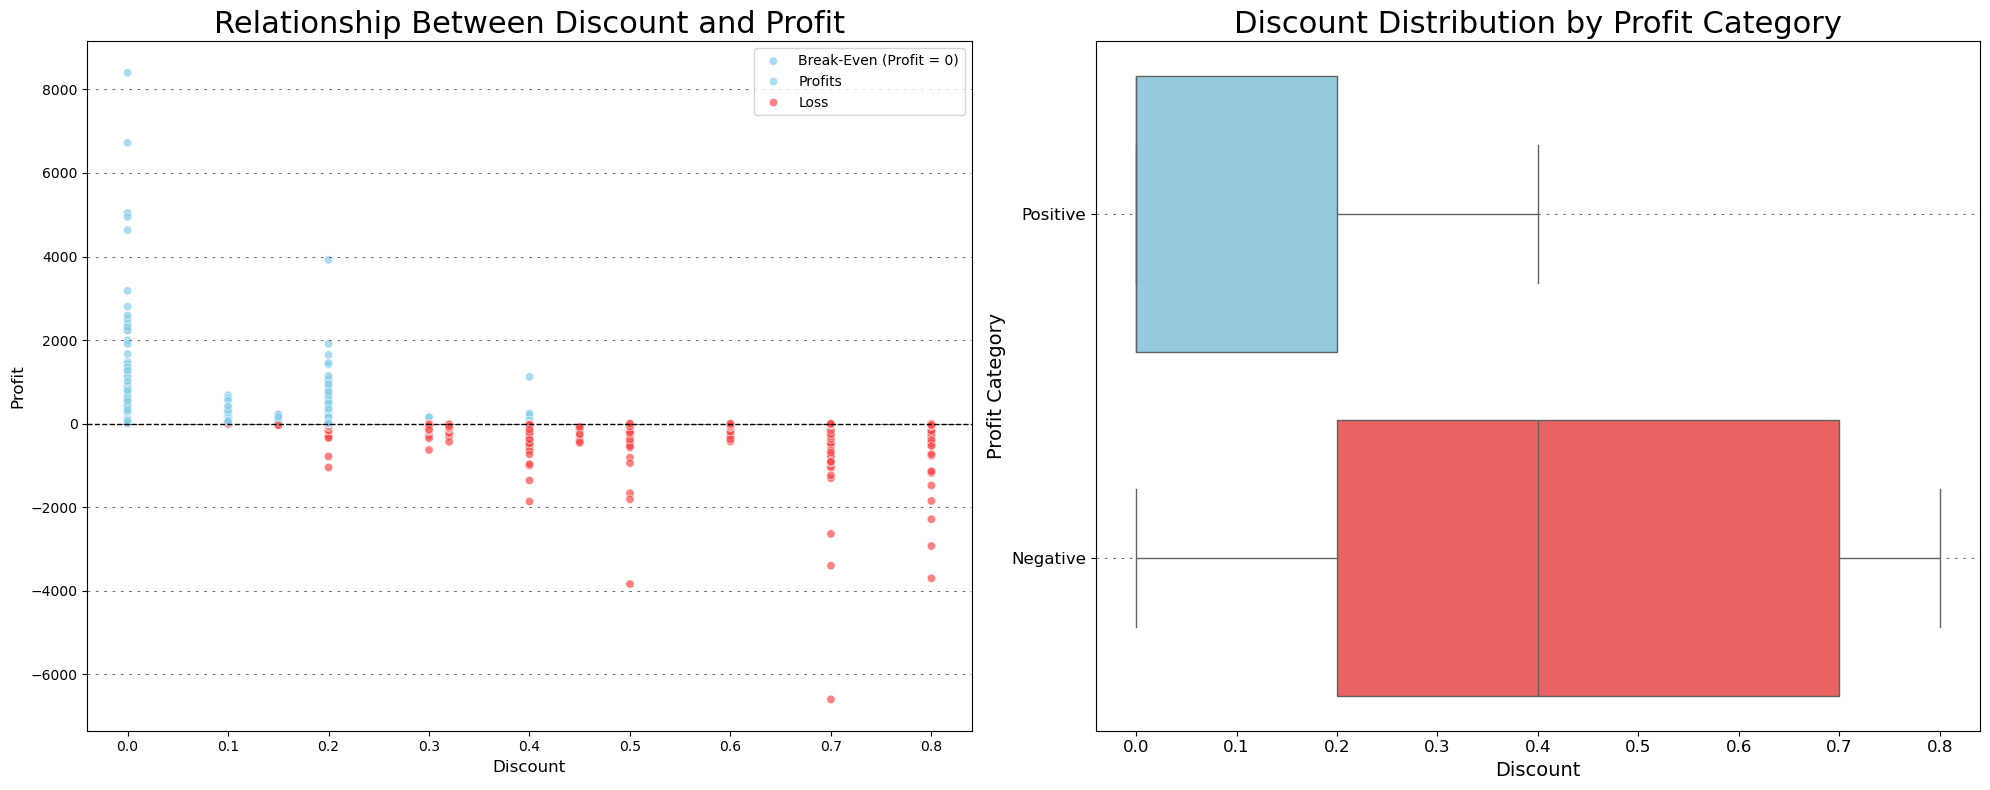

Chart 3.4. Discount vs Profit Relationship


In [32]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize = (20, 8))

# Plot the scatter plot
uni_enhanced_scatterplot(df_SaaS, 'Discount', 'Profit', 'Relationship Between Discount and Profit', ax = axes[0])

# Plot the box plot
boxplot_col_by_profit_category(df_SaaS, 'Discount', 'Discount Distribution by Profit Category', ax = axes[1])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()
print('Chart 3.4. Discount vs Profit Relationship')

Insight:

- `Profit` (Blue) range in discount from 0.0 to 0.4 and `Loss` (Red) range in discount from 0.0 to 1.0 which mean loss is distributed all over the range of discount.

-  most of the losses come from discount values between 0.4 and 0.8 is crucial. This indicates that offering discounts within this range often leads to loss.

- Higher concentarion of profitable point (Blue) at discount value of 0.0 and 0.2. Suggesting thath smaller discount are morelikely to retain profitability.

#### 2. Barplot Visualization

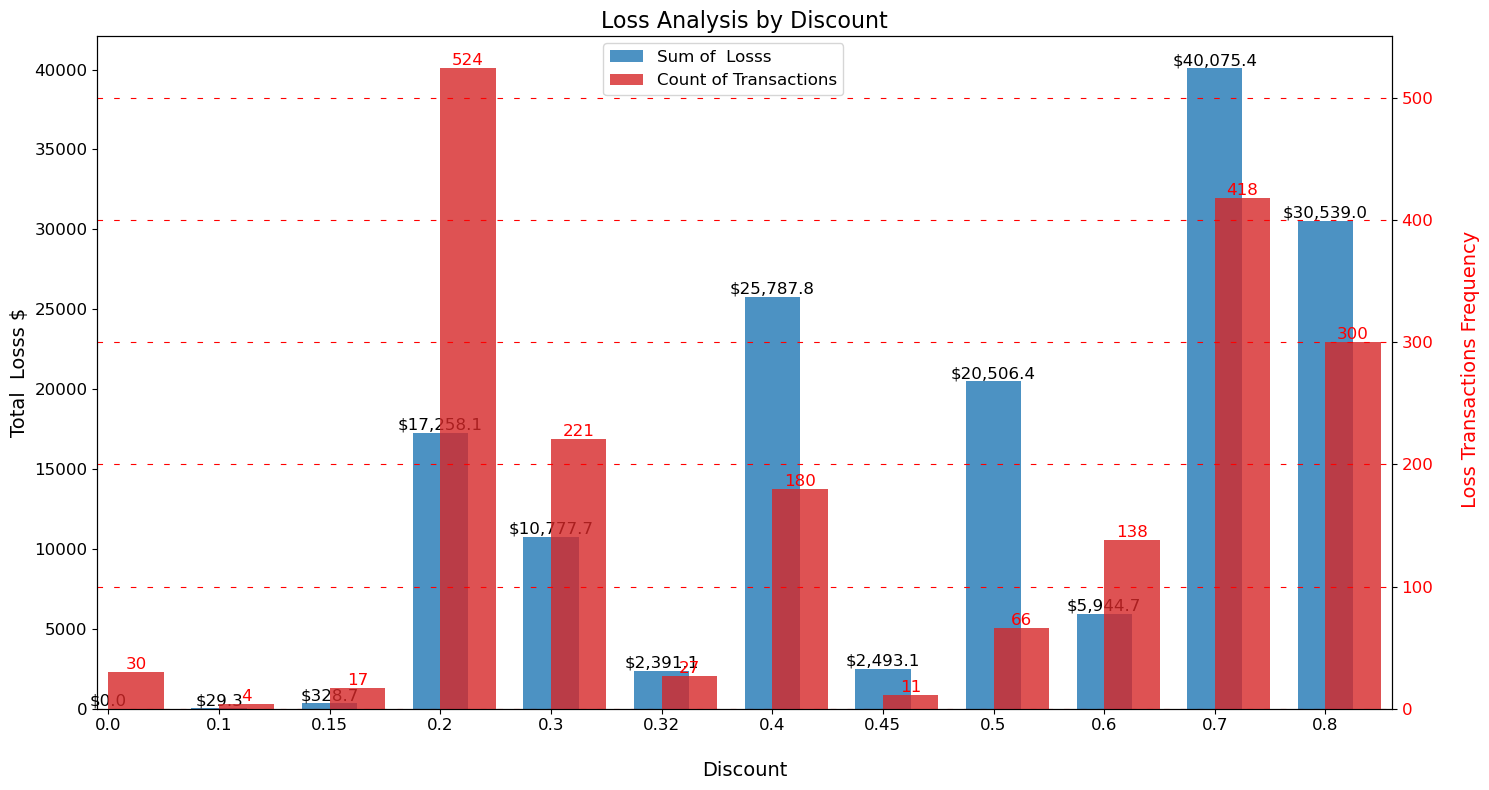

Chart 3.5. Total Losses and Loss Transactions Frequency by Discount


In [33]:
# Recall function for loss and frequency of transactions by discount
plotLossProfit_and_countsBars(discount_analysis_loss, 'Discount', 'Loss', 'Count', 'Loss Analysis by Discount', value_type =' Loss')
print('Chart 3.5. Total Losses and Loss Transactions Frequency by Discount')

Insight:

- Highest Total Losses:
    - The highest total losses occur at a discount level of 0.7, amounting to $40,075.4. It also has the second-highest loss transaction count with 418 transactions.

    - Other significant total losses are seen at discount levels 0.8 ($30,539.0) and 0.4 ($25,787.8). Discount level 0.8 also has a high loss transaction count (300 transactions).

    - Despite having a relatively low transaction count of 180, discount level 0.4 has one of the highest loss values at $25,787.8.

- Highest Transaction Frequency:
    - The highest count of loss transactions occurs at a discount level of 0.2, with 524 transactions.

    - Discount levels 0.7 and 0.8 also show high transaction counts, with 418 and 300 transactions respectively.

- Lower Discount Levels:
    - Discount levels 0.0, 0.1, 0.15, 0.32, and 0.45 have relatively low total losses and transaction counts compared to higher discount levels.

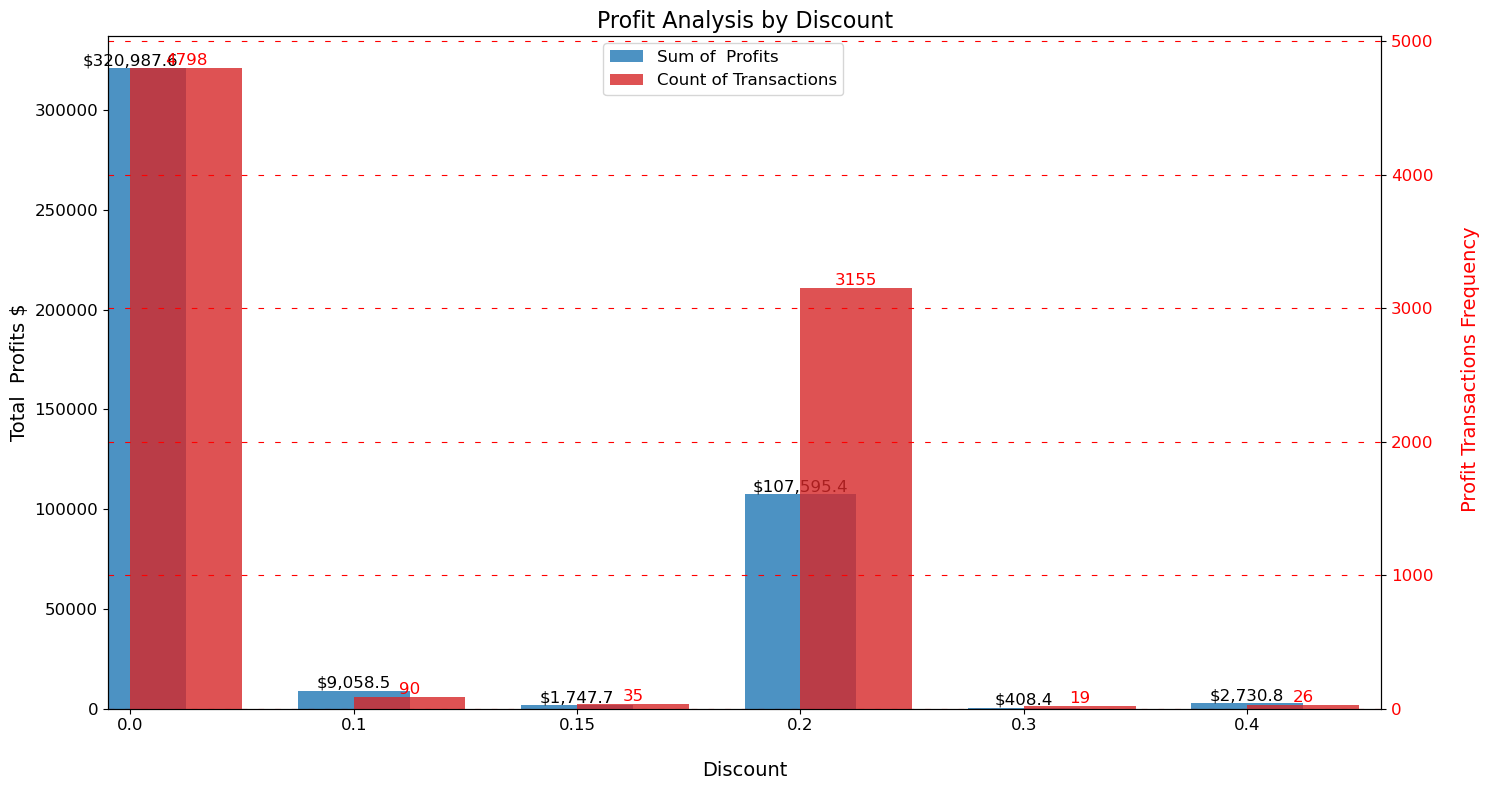

Chart 3.6. Total Profit and Profit Transactions Frequency by Discount


In [34]:
# Recall function for profit and frequency of transactions by discount
plotLossProfit_and_countsBars(discount_analysis_profit, 'Discount', 'Profit', 'Count', 'Profit Analysis by Discount', value_type= ' Profit')
print('Chart 3.6. Total Profit and Profit Transactions Frequency by Discount')

Insight:

- 0.0 Discount: This level shows the highest total profits at $320,987.68 with a significant transaction count of 4,978.

- 0.2 Discount: The second-highest total profits are at this discount level, with $107,595.40 and a transaction count of 3,155.

Based on "Chart 3.5. Total Losses and Loss Transactions Frequency by Discount," the discount levels from 0.5 to 0.8 show only negative values, with no positive values recorded. The majority of the company's profit is derived from discount levels 0.0 and 0.2.

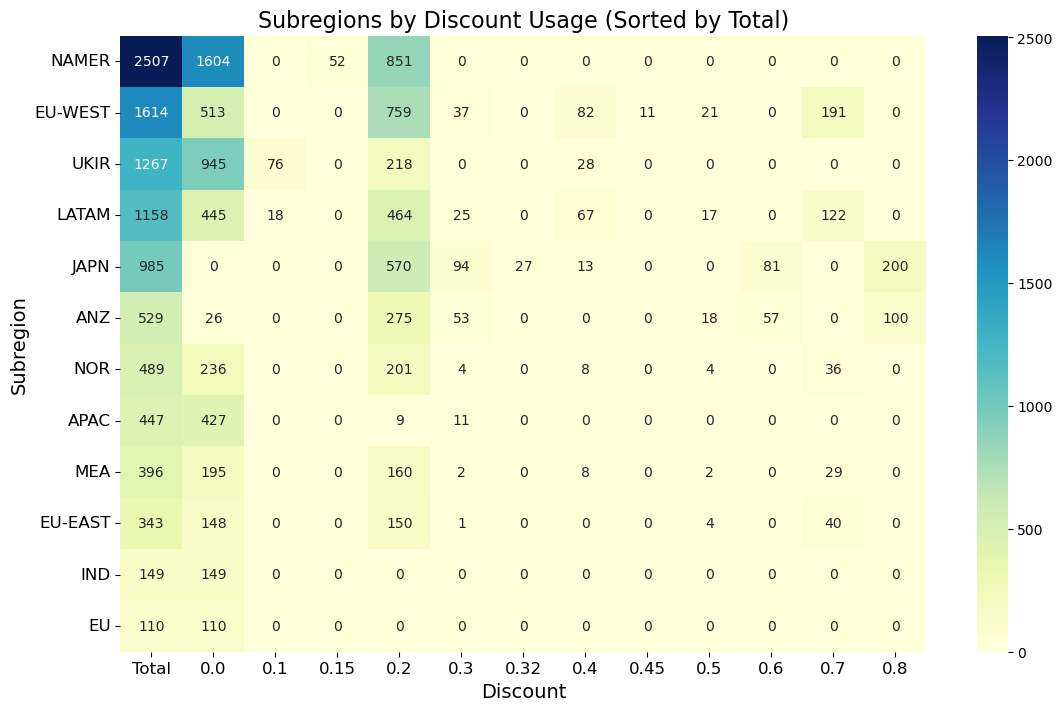

Chart 3.7. Subregions by Discount Usage (Sorted by Total)


In [35]:
# Plot the heatmap
plt.figure(figsize = (13, 8))
sns.heatmap(subregion_result, annot = True, fmt = 'd', cmap = 'YlGnBu', cbar = True)
plt.xlabel('Discount', fontsize = 14)
plt.ylabel('Subregion', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Subregions by Discount Usage (Sorted by Total)', fontsize = 16)
plt.show()
print('Chart 3.7. Subregions by Discount Usage (Sorted by Total)')

Notes:
- UKIR: United Kingdom & Ireland
- NAMER: North America
- EU-WEST: Western Europe
- NOR: Nordic countries
- JAPN: Japan
- EU: Europe
- MEA: Middle East & Africa
- LATAM: Latin America
- ANZ: Australia & New Zealand
- APAC: Asia-Pacific
- IND: India
- EU-EAST: Eastern Europe

Insight:

- High Usage:
    - NAMER (North America) has the highest total discount usage with 2,507 instances. This region shows significant usage at 0.0, 0.1, and 0.2 discount levels, indicating a strong preference for these lower discounts.

    - EU-WEST (Western Europe) follows with 1,614 instances, also showing notable discount usage at 0.0, 0.1, and 0.2 levels.

    - UKIR (United Kingdom & Ireland) comes next with 1,267 instances. The discount usage pattern is similar, with high usage at 0.0, 0.1, and 0.2 discount levels.

- Moderate to Low Usage:
    - LATAM (Latin America) and JAPN (Japan) have moderate discount usage, with totals of 949 and 889 instances, respectively. These regions primarily utilize discounts at 0.0 and 0.2 levels.

    - ANZ (Australia & New Zealand) and NOR (Nordic countries) show lower discount usage, with totals of 742 and 556 instances, respectively. The 0.0 discount level is predominant in these regions.

- Least Usage:
    - IND (India), EU-EAST (Eastern Europe), and MEA (Middle East & Africa) have the lowest total discount usage, ranging between 282 and 404 instances. Discount usage in these regions is more varied, with no single discount level dominating.

- Key Insights:
    - High Discount Usage: Regions like NAMER, EU-WEST, and UKIR show high discount usage, especially at lower discount levels (0.0, 0.1, and 0.2). These regions might benefit from targeted marketing strategies focusing on these discount levels.

    - Varied Patterns: While the majority of regions prefer lower discount levels, there are variations in usage patterns, particularly in regions with moderate to low total usage. This variation could indicate regional preferences or economic factors influencing discount usage.



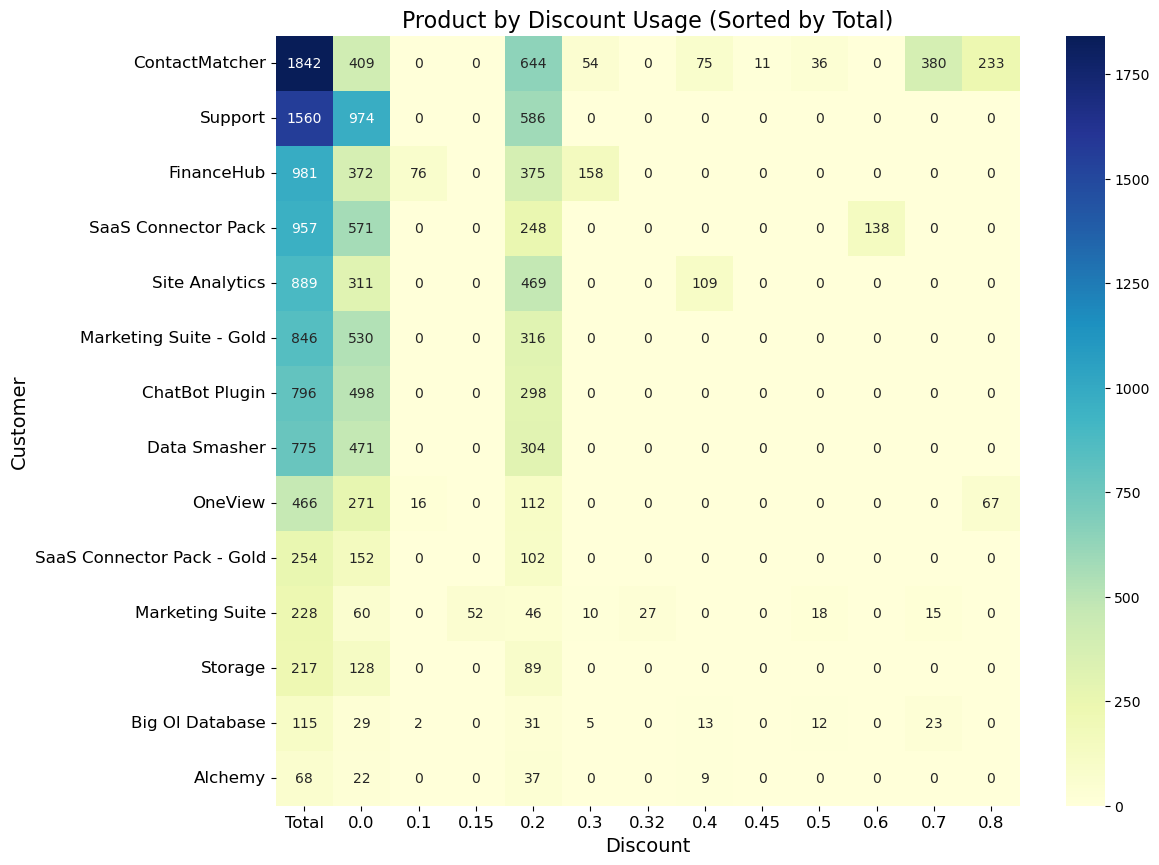

Chart 3.8. Product by Discount Usage (Sorted by Total)


In [36]:
# Plot the heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(Product_result, annot = True, fmt = 'd', cmap = 'YlGnBu', cbar = True)
plt.xlabel('Discount', fontsize = 14)
plt.ylabel('Customer', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Product by Discount Usage (Sorted by Total)', fontsize = 16)
plt.show()
print('Chart 3.8. Product by Discount Usage (Sorted by Total)')

Insight:

- Hight Usage:
    - ContactMatcher has the highest total discount usage at 1,750 instances, with significant usage across multiple discount levels, particularly 0.0, 0.1, and 0.2. This indicates a strong preference for lower discount levels.

    - Support follows with 1,500 instances, showing notable usage at 0.0 and 0.2 discount levels.

    - FinanceHub and SaaS Connector Pack also show substantial usage with 1,250 and 1,000 instances respectively, again with a preference for lower discounts.

    - Site Analytics ranks next with 900 instances, primarily utilizing 0.0 and 0.2 discount levels.

- Moderate to Low Usage:
    - Marketing Suite - Gold and ChatBot Plugin have moderate total discount usage, with 700 and 600 instances respectively. Their usage is spread across various discount levels but is more concentrated at 0.0 and 0.2.

    - Data Smasher and OneView show lower discount usage, with totals of 500 and 400 instances respectively. Their usage is primarily at the 0.0 discount level.

- Least Usage:
    - SaaS Connector Pack - Gold, Marketing Suite, Storage, Big OI Database, and Alchemy have the lowest total discount usage, ranging between 50 and 300 instances. Their usage is also concentrated at lower discount levels, particularly 0.0.

- Key Insights:
    - High Discount Usage: Customers like ContactMatcher, Support, and FinanceHub have high discount usage, especially at lower discount levels (0.0, 0.1, and 0.2). This could indicate that these customers are highly sensitive to discounts and are motivated by lower prices.

    - Varied Patterns: While the majority of customers prefer lower discount levels, there are variations in usage patterns among the top and bottom customers. Understanding these patterns can help in tailoring discount strategies to different customer segments.

## **3.4. Product Sales Performance Evaluation**

In this section, we will evaluate the performance of products based on their sales and profit data. This involves calculating key metrics, visualizing the results, and analyzing the performance of different products.

### 3.4.a. Preparation for Product Evaluation

#### - **Create Universal Barplot Function**: Define function to plot the relationship between two (2) variable and other parameters.

In [37]:
# Create barplot function for discount or else
def uni_enhanced_barplot(source, x_col, y_col, title, space, paint, f):
    """ 
    Create an enhanced bar plot with custom color gradients and annotations. 

    Parameters: 
        source : DataFrame containing the data 
        x_col : Column name for the X-axis values 
        y_col : Column name for the Y-axis values 
        title : Title of the plot 
        space : Space above each bar to place the annotation 
        paint : Color map for the bars (if 'default', uses a custom gradient from light red to light blue) 
        f     : Format string for the annotations (e.g., '$') 
    """
    
    # Copy the source data
    data = source.copy()

    if paint == 'default':
        # Custom color map for light red (low) to light blue (high)
        cmap    = LinearSegmentedColormap.from_list("light_red_to_light_blue", ["lightcoral", "lightblue"])
        norm    = plt.Normalize(data[y_col].min(), data[y_col].max())
        colors  = [cmap(norm(value)) for value in data[y_col]]
    else:
        colors = paint

    # Adjust canvas size
    fig, ax = plt.subplots(figsize = (15, 10))

    # Plot the bar chart
    sns.barplot(
        data        = data,
        x           = y_col,
        y           = x_col,
        palette     = colors,                                   # Apply the light red to light blue gradient
        errorbar    = None
    )

    # Annotate each bar with formatted values
    for patch in plt.gca().patches:                             # gca() stands for get current axes for individual bars in bar plot
        plt.text(
            patch.get_width() + (patch.get_width() * space),    # Slightly to the right of the bar
            patch.get_y() + patch.get_height() / 2,             # Center of the bar
            f"{f} {patch.get_width():,.0f}",                    # Add $ and format with commas
            ha          = 'left', 
            va          = 'center', 
            fontsize    = 12,
            color       = 'black'
        )

    # Increase the range slightly to fit the highest value
    plt.xlim(-4000, max(data[y_col].max(), data[y_col].max()) * 1.1)  

    # Customize plot
    plt.title(title, fontsize = 22)
    plt.xticks(rotation = 0, fontsize = 12)
    plt.yticks(rotation = 0, fontsize = 12)
    plt.xlabel(f'{y_col} / Product', fontsize = 14)
    plt.ylabel(x_col, fontsize = 14)
    plt.tight_layout()
    plt.show()

# Define the grouped bar plot function
def grouped_barplot(source, y_col, x_col1, x_col2, x_col3,title, currency):
    """
    Create a grouped bar plot to visualize the relationship between two variables.

    Parameters:
    - source    : DataFrame containing the dataset
    - y_col     : Column name for the y-axis values
    - x_col1    : Column name for the first x-axis values (Profit)
    - x_col2    : Column name for the second x-axis values (Loss)
    - title     : Title of the chart
    - currency  : Currency symbol for formatting
    """

    # Copy the source data
    data = source.copy()

    plt.figure(figsize = (15, 10))
    bar_width = 0.4
    index = range(len(data))

    # Use coolwarm colors
    coolwarm_colors = plt.get_cmap('coolwarm')
    color1 = coolwarm_colors(0.35)  # Cool color
    color2 = coolwarm_colors(0.65)  # Warm color

    plt.barh([i - bar_width / 2 for i in index], data[x_col1], bar_width, label=x_col1, color=color1)
    plt.barh([i + bar_width / 2 for i in index], data[x_col2], bar_width, label=x_col2, color=color2)

    plt.ylabel(y_col, fontsize = 14)
    plt.xlabel(f'{x_col1} and {x_col2}', fontsize = 14)
    plt.title(title, fontsize = 16)
    plt.yticks(index, data[y_col], rotation=0)
    plt.legend()

    # Add text labels with parentheses for negative values
    for i in index:
        profit_margin = data[x_col3].iloc[i]
        for y in [x_col1, x_col2]:
            if y == x_col1:
                value = data[y].iloc[i]
                text = f'{currency}{value:,.2f}' if value > 0 else f'           {currency}{value:,.2f}'
                plt.text(value, i - bar_width / 2 if y == x_col1 else i + bar_width / 2, text, 
                        ha     = 'left', 
                        va     = 'center', 
                        color  = 'black' if y == x_col1 else 'red'
                )
            else:
                value = data[y].iloc[i]
                text = (
                    f'{currency}{value:,.2f} ({(round(profit_margin,2))} %)' if value > 0 
                    else f'           {currency}{value:,.2f} ({(round(profit_margin,2))} %)'
                )
                plt.text(value, i - bar_width / 2 if y == x_col1 else i + bar_width / 2, text, 
                        ha     = 'left', 
                        va     = 'center', 
                        color  = 'black' if y == x_col1 else 'red'
                )
    
    # Set custom x-axis limits to avoid the far-right numbering issue
    plt.xlim(0, max(data[x_col1].max(), data[x_col2].max()) * 1.1)
    plt.ylim(-0.5, len(data) - 0.5)

    plt.tight_layout()
    plt.show()

To prepare the data for product performance evaluation, we will follow these steps:

#### - **Calculate Sum of Sales and Profit for Each Product**: 

Sum the sales and profit for each product to identify the top products.

In [38]:
tempo_df = df_SaaS.copy()

product_performance = (tempo_df
            .assign(Loss = lambda x: x['Profit'].apply(lambda y: y if y < 0 else 0),
                    Profit = lambda x: x['Profit'].apply(lambda y: y if y > 0 else 0))
            .groupby('Product', as_index = False)
            .agg({
                'Sales' : 'sum',
                'Profit' : 'sum',
                'Loss' : 'sum'
            })
)

product_performance['Net Profit'] = df_SaaS.groupby('Product')['Profit'].sum().reset_index()['Profit']
product_performance['Profit Margin'] = round(product_performance['Net Profit'] / product_performance['Sales'] * 100,2)

# Rename columns for clarity
product_performance.columns = ['Product', 'Total Sales', 'Profit', 'Loss', 'Net Revenue', 'Profit Margin']

display(product_performance, 'Table 3.6. Product Performance')

,Product,Total Sales,Profit,Loss,Net Revenue,Profit Margin
0,Alchemy,149528.0300,55617.8249,0.0000,55617.8249,37.20
1,Big Ol Database,189238.6310,33503.4251,-30118.6682,3384.7569,1.79
2,ChatBot Plugin,27118.7920,6527.7870,0.0000,6527.7870,24.07
3,ContactMatcher,410378.2650,83418.9269,-70922.6447,12496.2822,3.05
4,Data Smasher,167380.3180,42867.2622,-930.6265,41936.6357,25.05
5,FinanceHub,340935.4150,42017.2616,-9880.8413,32136.4203,9.43
6,Marketing Suite,114879.9963,8679.6500,-12152.2060,-3472.5560,-3.02
7,Marketing Suite - Gold,223843.6080,27705.1302,-6426.3038,21278.8264,9.51
8,OneView,107532.1610,26767.6466,-8629.6412,18138.0054,16.87
9,SaaS Connector Pack,91705.1640,19550.0570,-6490.9134,13059.1436,14.24


'Table 3.6. Product Performance'

##### - **Calculate Max, Min, and Count**: 

Calculate MaxMinCount by grouping product

In [39]:
df_SaaS

,Order ID,Order Date,Contact Name,Customer,Industry,Segment,Country,City,Region,Subregion,Product,Unit Price,Quantity,Discount,Sales,Profit,Profit Category,Profit Category Numeric
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Chevron,Energy,SMB,Ireland,Dublin,EMEA,UKIR,Marketing Suite,130.98,2,0.00,261.9600,41.9136,Positive,1
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Chevron,Energy,SMB,Ireland,Dublin,EMEA,UKIR,FinanceHub,243.98,3,0.00,731.9400,219.5820,Positive,1
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,Phillips 66,Energy,Strategic,United States,New York City,AMER,NAMER,FinanceHub,7.31,2,0.00,14.6200,6.8714,Positive,1
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Royal Dutch Shell,Energy,SMB,Germany,Stuttgart,EMEA,EU-WEST,ContactMatcher,348.21,5,0.45,957.5775,-383.0310,Negative,0
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Royal Dutch Shell,Energy,SMB,Germany,Stuttgart,EMEA,EU-WEST,Marketing Suite - Gold,13.98,2,0.20,22.3680,2.5164,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Johnson & Johnson,Healthcare,SMB,Germany,Hamburg,EMEA,EU-WEST,SaaS Connector Pack,10.52,3,0.20,25.2480,4.1028,Positive,1
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,American Express,Finance,SMB,United States,Milwaukee,AMER,NAMER,SaaS Connector Pack,45.98,2,0.00,91.9600,15.6332,Positive,1
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,American Express,Finance,SMB,United States,Milwaukee,AMER,NAMER,Site Analytics,161.61,2,0.20,258.5760,19.3932,Positive,1
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,American Express,Finance,SMB,United States,Milwaukee,AMER,NAMER,Support,7.40,4,0.00,29.6000,13.3200,Positive,1


#### - **Product Performance Per Region**: 

Calculate product count by size, and summerize Sales and Profit

In [40]:
# Group by region and product to calculate total sales, profit, and count of occurrences
df = (df_SaaS
    .groupby(['Region', 'Country', 'Product'])
    .agg(
        Product_Count  = ('Product','size'),      # Count occurrences of each product
        Price          = ('Unit Price', 'sum'),
        Sales          = ('Sales', 'sum'),
        Profit         = ('Profit', 'sum'),
        Total_discount = ('Discount','sum')
    )
).reset_index()

# Rename columns for clarity
df.columns = ['Region','Country', 'Product','Product Count', 'Price','Total Sales', 'Total Profit', 'Total Discount']

df['Profit Margin'] = round(df_SaaS['Profit'] / df_SaaS['Sales'] * 100,2)

# Calculate the thresholds
high_sales_threshold = df['Product Count'].quantile(0.75)
low_sales_threshold = df['Product Count'].quantile(0.25)

# Segment the customers using np.where()
df['Sales Segment'] = np.where(df['Product Count'] <= low_sales_threshold, 'Low',
                        np.where(df['Product Count'] <= high_sales_threshold, 'Medium', 'High'))

display(df, 'Table 3.7. Product Sales Performance Country')

,Region,Country,Product,Product Count,Price,Total Sales,Total Profit,Total Discount,Profit Margin,Sales Segment
0,AMER,Argentina,Big Ol Database,3,1459.98,9899.850,2709.9522,0.0,16.00,Medium
1,AMER,Argentina,ChatBot Plugin,11,148.97,742.800,203.2929,0.0,30.00,Medium
2,AMER,Argentina,ContactMatcher,17,2053.56,3947.812,1597.7882,0.6,47.00,Medium
3,AMER,Argentina,Data Smasher,9,349.55,1023.560,349.6286,0.0,-40.00,Medium
4,AMER,Argentina,FinanceHub,13,970.00,2728.240,563.0471,0.0,11.25,Medium
...,...,...,...,...,...,...,...,...,...,...
537,EMEA,United Kingdom,SaaS Connector Pack,101,2877.49,10374.140,3006.2444,0.0,31.25,High
538,EMEA,United Kingdom,SaaS Connector Pack - Gold,32,600.09,1776.830,831.0267,0.0,27.00,High
539,EMEA,United Kingdom,Site Analytics,109,13668.17,47502.620,13399.1892,0.0,25.00,High
540,EMEA,United Kingdom,Storage,21,67.33,286.510,116.6671,0.0,44.00,High


'Table 3.7. Product Sales Performance Country'

### 3.4.b. Chart Visualization

#### 1. Product Profit Margins

This visualization dataset is taken from `product_performance` which a processed data from main dataset `df_SaaS`

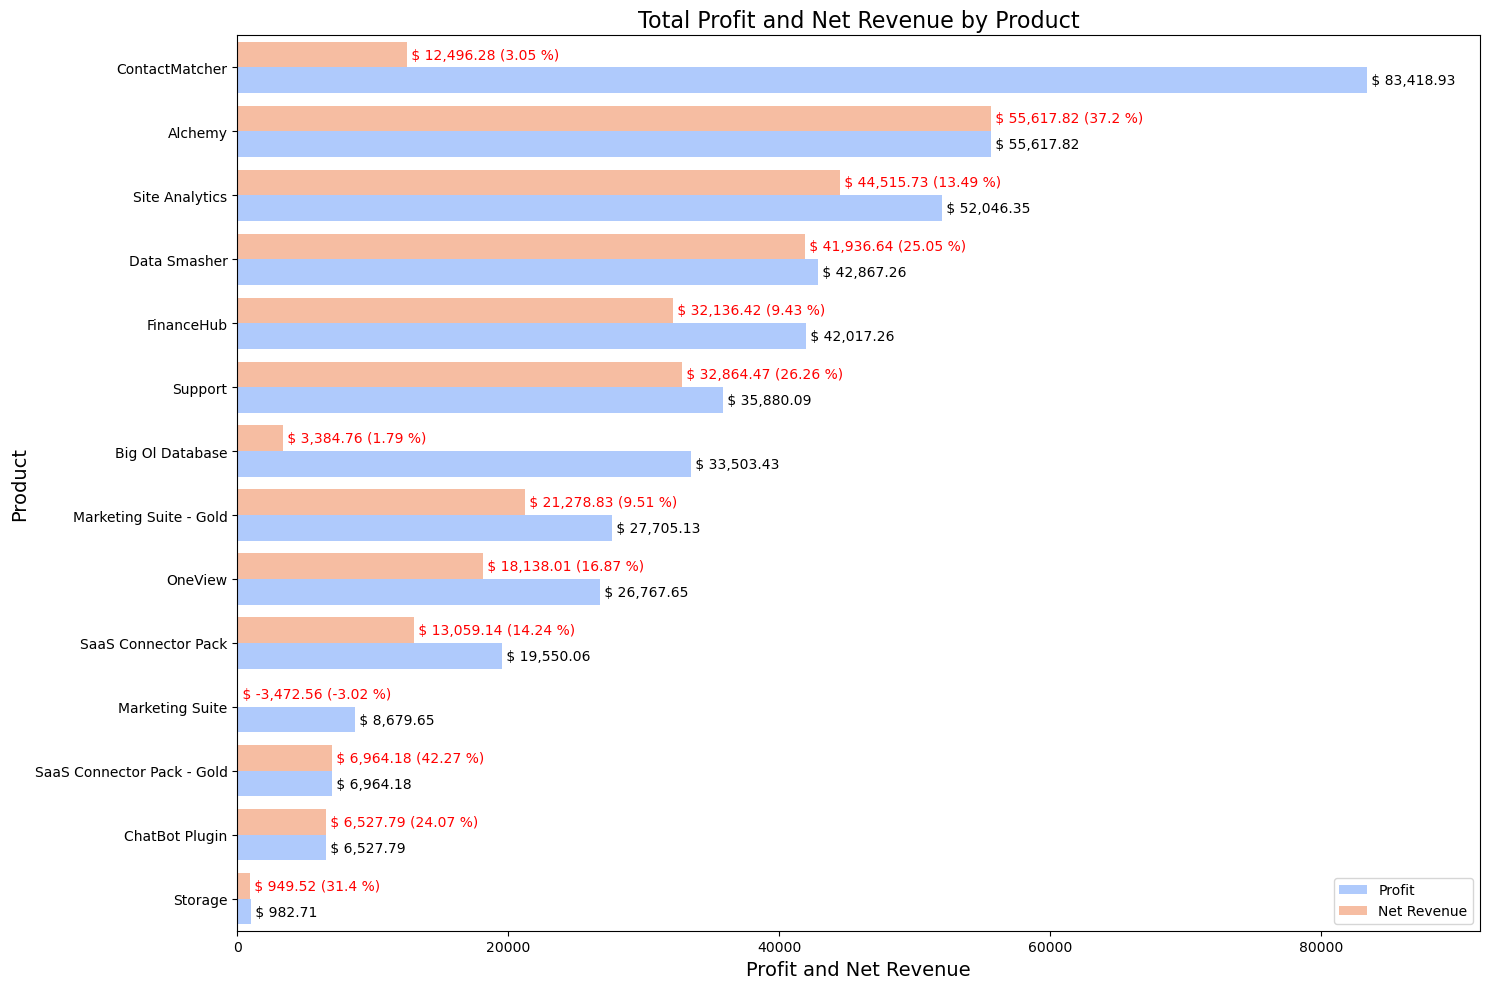

Chart 3.9. Total Profit and Profit Margins by Product


In [41]:
# # Call the function with the correct parameters
grouped_barplot(product_performance.sort_values(by = 'Profit', ascending = True), 
                'Product', 'Profit', 'Net Revenue', 'Profit Margin','Total Profit and Net Revenue by Product', ' $ ')
print('Chart 3.9. Total Profit and Profit Margins by Product')

Insight:

- **Top Performing Products**: 

    - Alchemy: The highest net revenue of $55,617.82, with a profit margin of 37.20%

    - Support: Net revenue of $35,864.47 and a profit margin of 26.26%

    - Data Smasher: High net revenue of $41,936.64 and a profit margin of 25.05%.

- **Product with High Losses**:

    - Marketing Suite: Net loss of $3,472.56 despite a profit margin of -3.02%.

    - ContactMatcher: Net revenue $12,496.28 from $83,418.93 (extremely high loss) and a profit margin of 3.05%

    - Big Ol Database: Net revenue $3,384.75 and a profit margin of 1.79%

By analyzing the net revenue and profit margins of each product, the company can make informed decisions to optimize its product portfolio, improve cost management, and drive overall profitability.

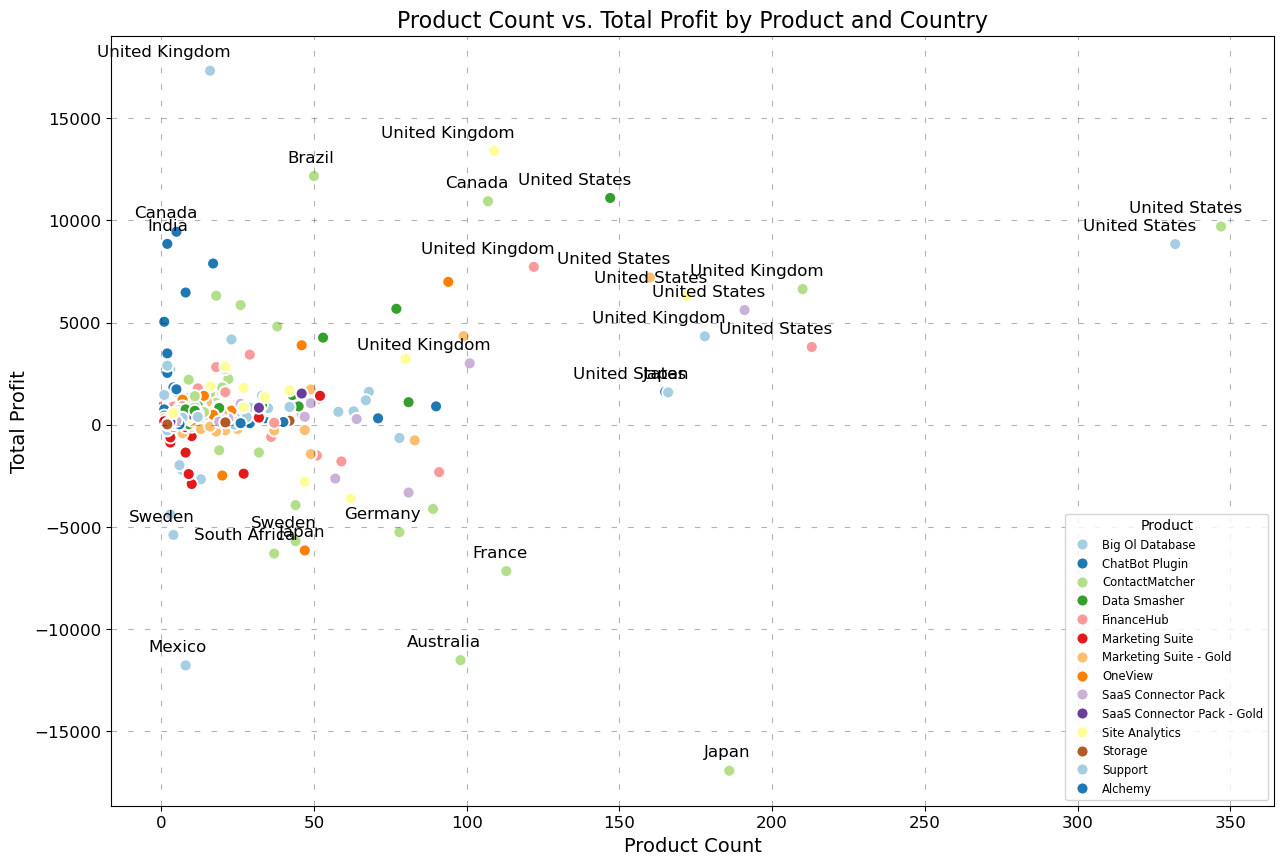

Chart 3.10. Country by Product Sales Distribution


In [42]:
# Thresholds for annotating high-value points
threshold_x = 100
threshold_ytop = 8000
threshold_ybot = -4500

# Creating the scatter plot with increased marker size and distinct colors
plt.figure(figsize = (15, 10))
scatter = sns.scatterplot(data    = df, 
                          x       = 'Product Count', 
                          y       = 'Total Profit', 
                          hue     = 'Product', 
                          palette = 'Paired', 
                          s       = 300, 
                          marker  = '.'
            )

# Annotating points with country names for high-value points
for i, country in enumerate(df['Country']):
    if df['Product Count'][i] > threshold_x or df['Total Profit'][i] > threshold_ytop or threshold_ybot > df['Total Profit'][i] :
        plt.annotate(country, (df['Product Count'][i], df['Total Profit'][i]),
                     textcoords = "offset points", xytext = (15, 10), ha = 'right', fontsize = 12)

# Adding titles and labels
plt.title('Product Count vs. Total Profit by Product and Country', fontsize = 16)
plt.xlabel('Product Count', fontsize = 14)
plt.ylabel('Total Profit', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(visible   = True, 
         linestyle = (0, (5, 10)), 
         alpha     = 0.3, 
         color     = 'black', 
         axis      = 'both'
)
plt.legend(title = 'Product', fontsize = 'small', title_fontsize = '10')
plt.show()
print('Chart 3.10. Country by Product Sales Distribution')

Insight:

- High Profit and Low Product Count:

    - Canada, India, and Brazil show high total profits despite having relatively low product counts. This suggests that these countries are highly profitable even with fewer products, indicating high-value or high-margin products.

- High Product Count and High Profit:

    - The United States stands out with both a high product count and high total profit. This indicates a large market with a significant volume of profitable products, making it a key market for the company.

- Negative Profit:

    - Mexico, Australia, and Japan have negative total profits, with varying product counts. This suggests challenges in these markets, where costs may outweigh revenues.

- Clustered Data:

    - Many countries are clustered around the lower product count and lower profit range. This indicates a common trend among several countries, where the majority of the products are generating moderate profits.

- Outliers:

    - The United States appears multiple times with varying product counts and profits, indicating different performance metrics for different products. This suggests a diverse portfolio of products with varying success rates.

## **3.5. Customer Retention**

Definition: Cohort analysis involves grouping customers based on the month they made their first purchase and tracking their behavior over time. Helps identify trends, patterns, and insights into customer retention and churn. The cohort method was used to create a retention dataset from the main dataset, df_SaaS, to analyze customer transaction retention.

### 3.5.a. Preparation for Retention

To prepare the data for customer transaction retention analysis, we will follow these steps:

#### - **Create Cohort Visualization Functions**: Define basic and enhanced functions to visualize customer cohorts.



In [43]:
# Create function for cohort analysis
def cohort_visualization(source, dtype, title):
    """
    Generate an enhanced heatmap for cohort analysis to visualize customer sales retention.
    
    Parameters:
        source : DataFrame
            DataFrame containing the cohort data.
        dtype : str
            A string indicating the type of data (e.g., 'Sales', 'Retention').
    
    Returns:
        None
            Displays the heatmap.
    """

    # Rename columns to 'n1', 'n2', 'n3', etc.
    source.columns = [f'N{i+1}' for i in range(source.shape[1])]

    # Create a custom gradient from light red to light blue
    custom_cmap = LinearSegmentedColormap.from_list("light_red_to_light_blue", ['lightblue', 'lightcoral'])

    # Plot heatmap with the labels on the top
    plt.figure(figsize = (25, 12))
    sns.heatmap(
        data        = source,
        annot       = True,
        fmt         = '.2f',
        cmap        = custom_cmap,
        xticklabels = source.columns,  # Ensure the new labels are on top
        cbar_kws    = {'orientation': 'vertical'}  # Colorbar remains vertical
    )

    plt.title(f'{title}' + f' ({dtype})\n', fontsize = 22)
    plt.xlabel('\nPeriod Distance', fontsize = 12)  # Add title for x-axis
    plt.yticks(rotation = 0)
    plt.ylabel('Cohort Group\n', fontsize = 12)    # Add title for y-axis
    plt.gca().xaxis.tick_top()  # Move x-axis labels to the top
    plt.gca().tick_params(axis='x', rotation = 0)  # Keep labels horizontal
    plt.show()

#### - **Create a New Table for Cohort Analysis**: Extract the necessary columns from the dataset and sort them for cohort analysis.

In [44]:
# Create new table from 'df_SaaS' for 'Order Date' and 'Contact Name'
df_SaaS_Cohort = df_SaaS[['Order Date', 'Contact Name']].sort_values('Order Date')

# Sorten but using '.transform('min')' for date
df_SaaS_Cohort['Cohort_Month'] = (
                # Source
                df_SaaS_Cohort
                
                # Grouped by 'Contact Name'
                .groupby('Contact Name')['Order Date']
                
                # function for finding the earliest (minimum) 
                # order date for each contact within the new table
                .transform('min')
)

# Create 2 Quartile columns for create time line cohort
df_SaaS_Cohort['Cohort_Month'] = df_SaaS_Cohort['Cohort_Month'].dt.to_period('Q')
df_SaaS_Cohort['Current_Activity_Month'] = df_SaaS_Cohort['Order Date'].dt.to_period('Q')

# Show
df_SaaS_Cohort.head(10)

,Order Date,Contact Name,Cohort_Month,Current_Activity_Month
7980,2020-01-04,Brian Dickens,2020Q1,2020Q1
739,2020-01-05,Liam Churchill,2020Q1,2020Q1
740,2020-01-05,Liam Churchill,2020Q1,2020Q1
741,2020-01-05,Liam Churchill,2020Q1,2020Q1
1759,2020-01-06,Ella Springer,2020Q1,2020Q1
7476,2020-01-07,Andrea Hughes,2020Q1,2020Q1
7474,2020-01-07,Andrea Hughes,2020Q1,2020Q1
7475,2020-01-07,Andrea Hughes,2020Q1,2020Q1
7180,2020-01-07,Keith Coleman,2020Q1,2020Q1
7477,2020-01-07,Andrea Hughes,2020Q1,2020Q1


#### - **Extract Cohort and Activity Months**: Convert order dates to quarterly periods to create cohort and activity month columns.

In [45]:
# Grouping by Quartile date time
df_SaaS_Cohort_Processed = (
        df_SaaS_Cohort
        .groupby(['Cohort_Month', 'Current_Activity_Month'])[['Contact Name']]
        .nunique()
        .reset_index()
)

# Rename columns name
df_SaaS_Cohort_Processed.rename(columns = {'Contact Name' : 'Total_Distinct_Cust'}, inplace = True)

# Show
df_SaaS_Cohort_Processed.head(10)

,Cohort_Month,Current_Activity_Month,Total_Distinct_Cust
0,2020Q1,2020Q1,121
1,2020Q1,2020Q2,20
2,2020Q1,2020Q3,28
3,2020Q1,2020Q4,41
4,2020Q1,2021Q1,18
5,2020Q1,2021Q2,27
6,2020Q1,2021Q3,33
7,2020Q1,2021Q4,45
8,2020Q1,2022Q1,25
9,2020Q1,2022Q2,35


#### - **Group by Cohort and Activity Month**: Count distinct customers per cohort to analyze retention.

In [46]:
# Create Period Distance and taking number by attrgetter
df_SaaS_Cohort_Processed['Period_Distance'] = (
        (df_SaaS_Cohort_Processed['Current_Activity_Month'] - 
        df_SaaS_Cohort_Processed['Cohort_Month'])
        .apply(attrgetter('n'))
)

# Show
df_SaaS_Cohort_Processed.head(10)

,Cohort_Month,Current_Activity_Month,Total_Distinct_Cust,Period_Distance
0,2020Q1,2020Q1,121,0
1,2020Q1,2020Q2,20,1
2,2020Q1,2020Q3,28,2
3,2020Q1,2020Q4,41,3
4,2020Q1,2021Q1,18,4
5,2020Q1,2021Q2,27,5
6,2020Q1,2021Q3,33,6
7,2020Q1,2021Q4,45,7
8,2020Q1,2022Q1,25,8
9,2020Q1,2022Q2,35,9


#### - **Pivot Table**: Create pivot table by df_SaaS_Cohort_Processed

In [47]:
# Create pivot table from Processed recent dataset
df_cohort_pivot = (
        # Source
        df_SaaS_Cohort_Processed
        
        # pivot funct
        .pivot_table(
                index   = 'Cohort_Month',
                columns = 'Period_Distance',
                values  = 'Total_Distinct_Cust'
        )
)

# Rounding percentage (%) with 2 number behind comma
df_cohort_pivot_percentage = round((df_cohort_pivot.divide(df_cohort_pivot.iloc[:,0], axis = 0)) * 100, 2)

# Show
display(df_cohort_pivot_percentage, 'Table 3.8. Customer Transaction Retention')

Period_Distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Cohort_Month,,,,,,,,,,,,,,,,
2020Q1,100.0,16.53,23.14,33.88,14.88,22.31,27.27,37.19,20.66,28.93,35.54,43.80,28.10,40.50,42.98,54.55
2020Q2,100.0,24.38,36.25,17.50,27.50,29.38,42.50,20.00,31.87,35.00,48.12,23.12,36.88,44.38,53.75,NaN
2020Q3,100.0,32.92,18.63,28.57,29.81,41.61,18.63,28.57,40.99,43.48,22.36,38.51,45.96,52.80,NaN,NaN
2020Q4,100.0,17.65,20.26,31.37,39.87,19.61,32.68,37.91,41.18,25.49,37.25,41.18,62.75,NaN,NaN,NaN
2021Q1,100.0,25.00,31.25,25.00,18.75,18.75,34.38,53.12,34.38,40.62,21.88,50.00,NaN,NaN,NaN,NaN
2021Q2,100.0,30.56,38.89,27.78,27.78,44.44,41.67,36.11,19.44,55.56,58.33,NaN,NaN,NaN,NaN,NaN
2021Q3,100.0,41.67,27.78,22.22,38.89,44.44,25.00,50.00,55.56,41.67,NaN,NaN,NaN,NaN,NaN,NaN
2021Q4,100.0,9.38,15.62,34.38,37.50,34.38,21.88,40.62,53.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022Q1,100.0,42.86,42.86,50.00,57.14,42.86,64.29,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'Table 3.8. Customer Transaction Retention'

this pivot table will be used to create heatmap to make easy visualization of it, so it can be seen using the intensity of the color

### 3.5.b. Chart Visualization

In this cohort / retention often use heatmaps for visualization due to its intuitive and visually effective way to understand and track customer behavior over time. Heatmaps display data using color gradients, making it easy to identify trends and patterns at a glance. and also the varying shades represent different values, allowing users to quickly see where there are high or low retention rates.

#### 1. Retention Heatmap

This retention dataset was derived from the main dataset, df_SaaS, and processed using the cohort method and the end resault in data `df_cohort_pivot_percecntage`. It tracks customer transaction retention quarterly from Q1 2020 to Q4 2023, as demonstrated in Table 3.-- through Table 3.--.

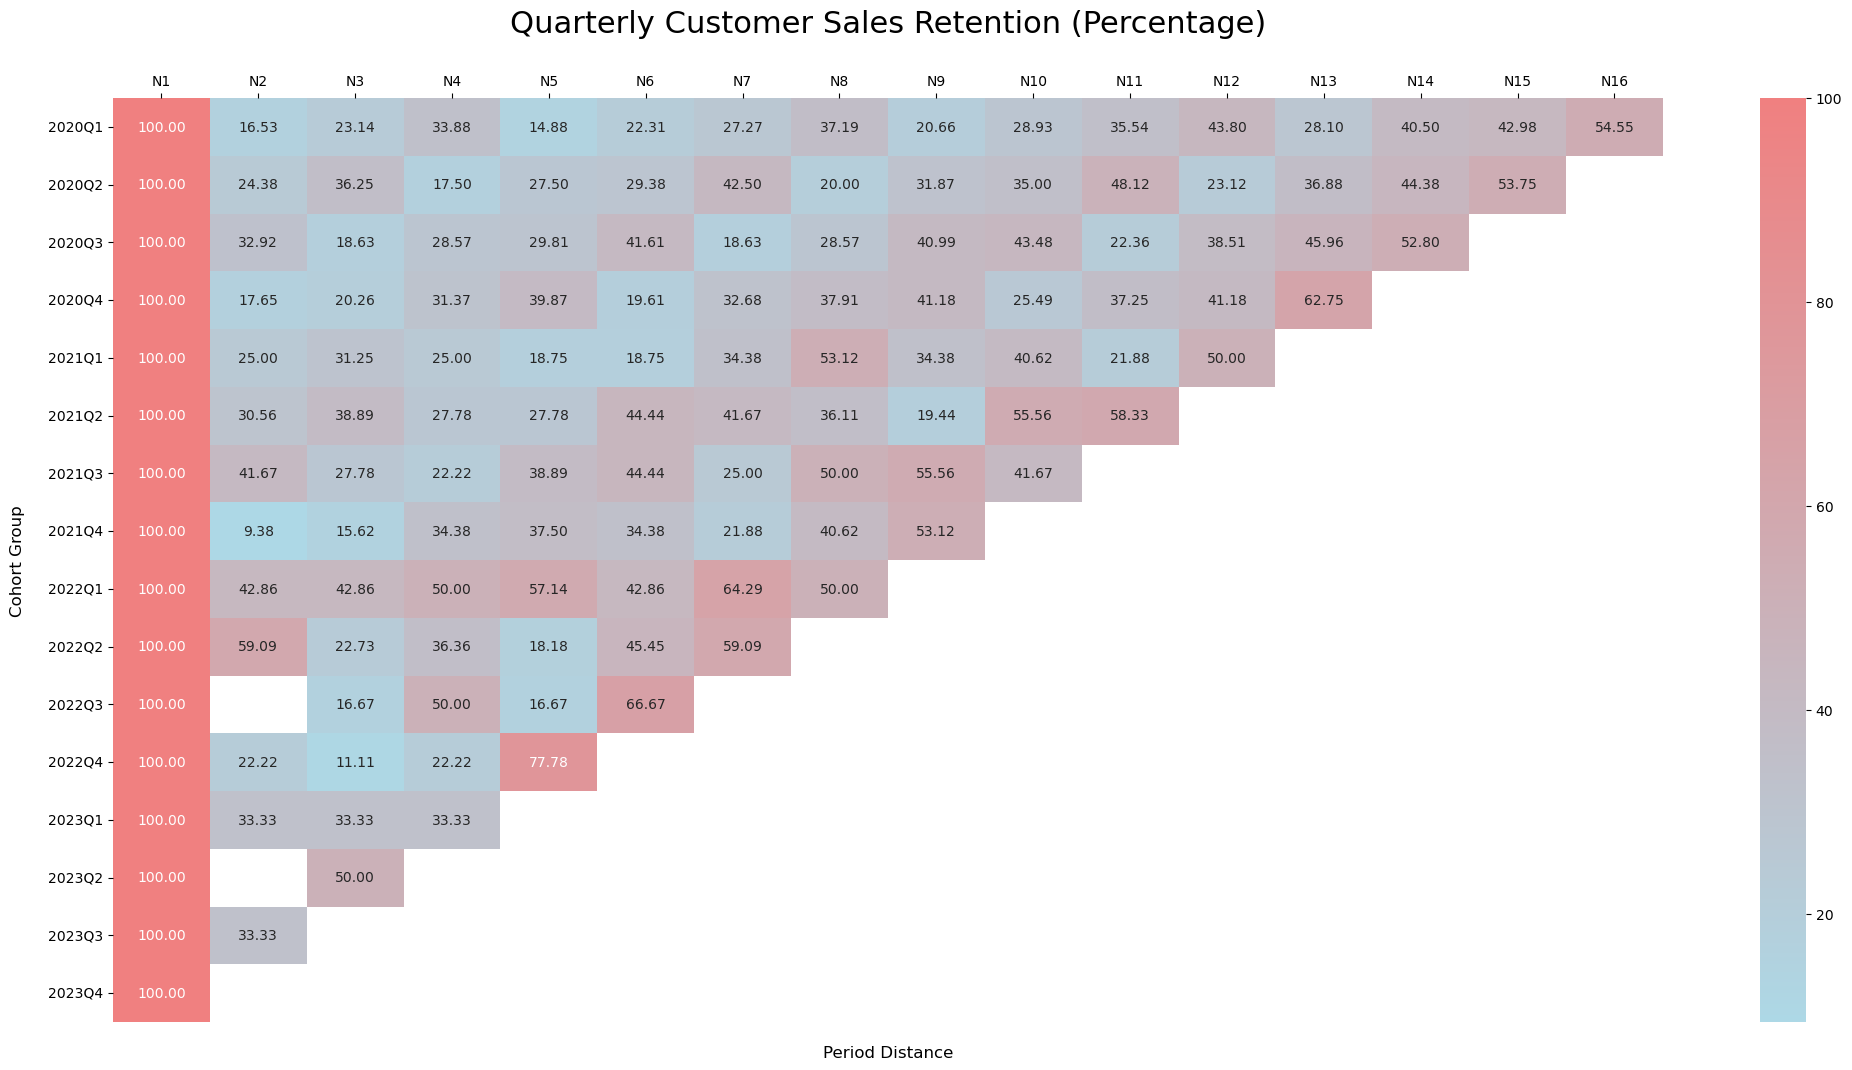

Chart 3.11. Quartely Customer Sales Retention


In [48]:
# Percentage
cohort_visualization(df_cohort_pivot_percentage, 'Percentage', 'Quarterly Customer Sales Retention')
print('Chart 3.11. Quartely Customer Sales Retention')

The heatmap provides valuable insight into customer retention trends across different cohorts and time periods. By analyzing these patterns, businesses can identify areas for improvement, replicate success strategies, and make informed decisions to enhance customer retention and overall business performance. 

Insight:

- In Quartile 2 year 2023 and Quartile 3 2022, 2nd period distance values is 0, its mean no customer from that Quartile Year re-enggage or make transaction.

- Pattern in Quartile 3 year 2020, 2021, and 2023, also Quartile 2 year 2022 which indicate the certain marketing strategic in that period of time, or Customer (Company) Strategic Spending consist of subscription renewal / upgrades, or End-of-Yer Budget Utilization.

- Certain cohorts experience sharp declines in retention rates at specific periods. A striking example is the Quartile 3 year 2021 cohort, which sees a steep drop from 41.67% in N2 to 9.38% in 3rd period distance.

- Due to SaaS is based on Subscription, it makes sense to have pattern for each year of Q1 and Q2 have the lowest value, except Quartile 1 and 2 2022 periode time N2, due to subscription time.

- For Quartile 1 and 2 2022, it might due to customer satisfaction from their purchase or marketing strategic (discount or other). By that their satisfaction create full purchase for Customer (Company) system.

- This retention are align with `Chart 3.2. Sales, Loss, and Profit Quarterly Trend Analysis (2020 - 2023)` for each Q1 to Q4 increase and Q4 to Q1 significant drop of Trends and Retention.

# **4. Conclusion and Recommendation**

## **4.1 Conclusion**
Analyzing AWS SaaS sales data from 2020 to 2023 provides us with some noteworthy conclusions and actionable insights:

1. Profitability and Revenue Performance:

    - AWS SaaS sales have shown solid performance, with 73.9% of transactions generating a profit ($442,528) and 26.1% showing losses ($156,131).

    - The company has managed a total profit of $286,397, achieving a profit margin of 12.5%. While this margin is decent, it is relatively modest for a company the size of AWS, which might aim for higher margins.

    - A positive trend is observed in both profit and sales over the years, indicating consistent growth from 2021 to 2023.

2. Discount Analysis:

    - Lower discount levels (0-20%) generally result in higher profits, with the 0% discount tier being the most profitable ($320,987) and having the highest transaction count (4,798).

    - High discounts, particularly those at 0.7 and 0.8, are the main contributors to losses. Although the 0.2 discount is frequently used, its lower value means its financial impact is less severe.

3. Regional and Customer Insights:

    - Regions such as NAMER, EU-WEST, and UKIR have performed exceptionally well, whereas regions like IND, EU-EAST, and MEA have shown lower discount usage and performance.

    - High-volume customers like ContactMatcher and Support drive significant transactions, while products like Alchemy achieve high profit margins despite lower volumes.

4. Product Performance:

    - Top Performers: Products such as Alchemy and Data Smasher have shown robust profitability with high total profits and margins.

    - Underperformers: Products like Marketing Suite and SaaS Connector Pack - Gold require strategic adjustments to improve their performance.

    - Managing high discounts for products like ContactMatcher and Big Ol' Database is crucial to maintaining profitability.

5. Customer Retention:

    - Customer retention shows variability, with some cohorts demonstrating strong mid-term retention. This trend aligns with overall sales trends, suggesting a need for targeted retention strategies.

## **4.2 Recommendations**

1. Pricing and Discount Strategy:

    - Re-evaluate discount rates for each product to prevent losses. Implement targeted discount campaigns for specific customer segments to optimize engagement without excessive discounts.

    - Set a maximum discount cap of 40% to minimize losses and reserve higher discounts for strategic accounts with proven long-term value.

    - Create standardized discount tiers (0%, 10%, 20%) and consider eliminating discounts above 60% due to their consistent negative impact.

2. Regional Focus:

    - Invest in expanding the presence in top-performing regions like NAMER and EU-WEST. Develop targeted strategies to improve penetration in APAC and MEA regions.

    - Establish region-specific pricing tiers based on market maturity and purchasing power.

3. Product Strategy:

    - Continue investing in and marketing top-performing products like Alchemy and Data Smasher to drive revenue growth.

    - Review the pricing structure for products like ContactMatcher to improve margins while maintaining volume. Aggressively promote high-margin products.

    - Bundle complementary products (e.g., Support with ContactMatcher) to enhance overall margins and consider phasing out or restructuring underperforming products.

4. Customer Retention:

    - Implement early warning systems for customers showing declining retention rates. Develop targeted retention programs for quarters 3-4 where drop-offs are most common.

    - Create customer success programs for high-value accounts and offer loyalty rewards for customers maintaining consistent purchase volumes.

5. Sales and Marketing:

    - Focus marketing efforts on high-margin products and develop case studies from successful implementations in top-performing regions.

    - Create targeted campaigns for industries with the best retention rates and establish a deal desk to review and approve non-standard discounts.